In [1]:
pip install mlflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import mlflow
import mlflow.sklearn
mlflow.set_tracking_uri("file:./mlruns")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = pd.read_excel("daataset.xlsx.xlsx")
data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0         NaN        NaN                    NaN  ...   
1    -0.02234  -0.517413               0.010677  ...   
2         NaN        NaN                    NaN  ...   
3         NaN        NaN                    NaN  ...   
4         NaN        NaN                    NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 111 columns]

In [5]:
data.shape

(5644, 111)

# Analyse de la forme des données

In [6]:

df = data.copy()

In [7]:
df

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0     44477f75e8169d2                    13               negative   
1     126e9dd13932f68                    17               negative   
2     a46b4402a0e5696                     8               negative   
3     f7d619a94f97c45                     5               negative   
4     d9e41465789c2b5                    15               negative   
...               ...                   ...                    ...   
5639  ae66feb9e4dc3a0                     3               positive   
5640  517c2834024f3ea                    17               negative   
5641  5c57d6037fe266d                     4               negative   
5642  c20c44766f28291                    10               negative   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   ...  \
0            NaN        NaN                    NaN  ...   
1      -0.022340  -0.517413               0.010677  ...   
2            NaN        NaN                    NaN  ...   
3            NaN        NaN                    NaN  ...   
4            NaN        NaN                    NaN  ...   
...          ...        ...                    ...  ...   
5639         NaN        NaN                    NaN  ...   
5640         NaN        NaN                    NaN  ...   
5641         NaN        NaN                    NaN  ...   
5642         NaN        NaN                    NaN  ...   
5643    0.541564  -0.906829              -0.325903  ...   

      Hb saturation (arterial blood gases)  \
0                                      NaN   
1                                     

In [8]:
df.shape

(5644, 111)

In [9]:
df.dtypes.value_counts()


float64    70
object     37
int64       4
Name: count, dtype: int64

<Axes: ylabel='count'>

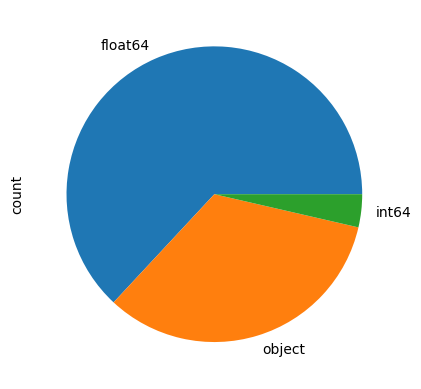

In [10]:
df.dtypes.value_counts().plot.pie()

<Axes: >

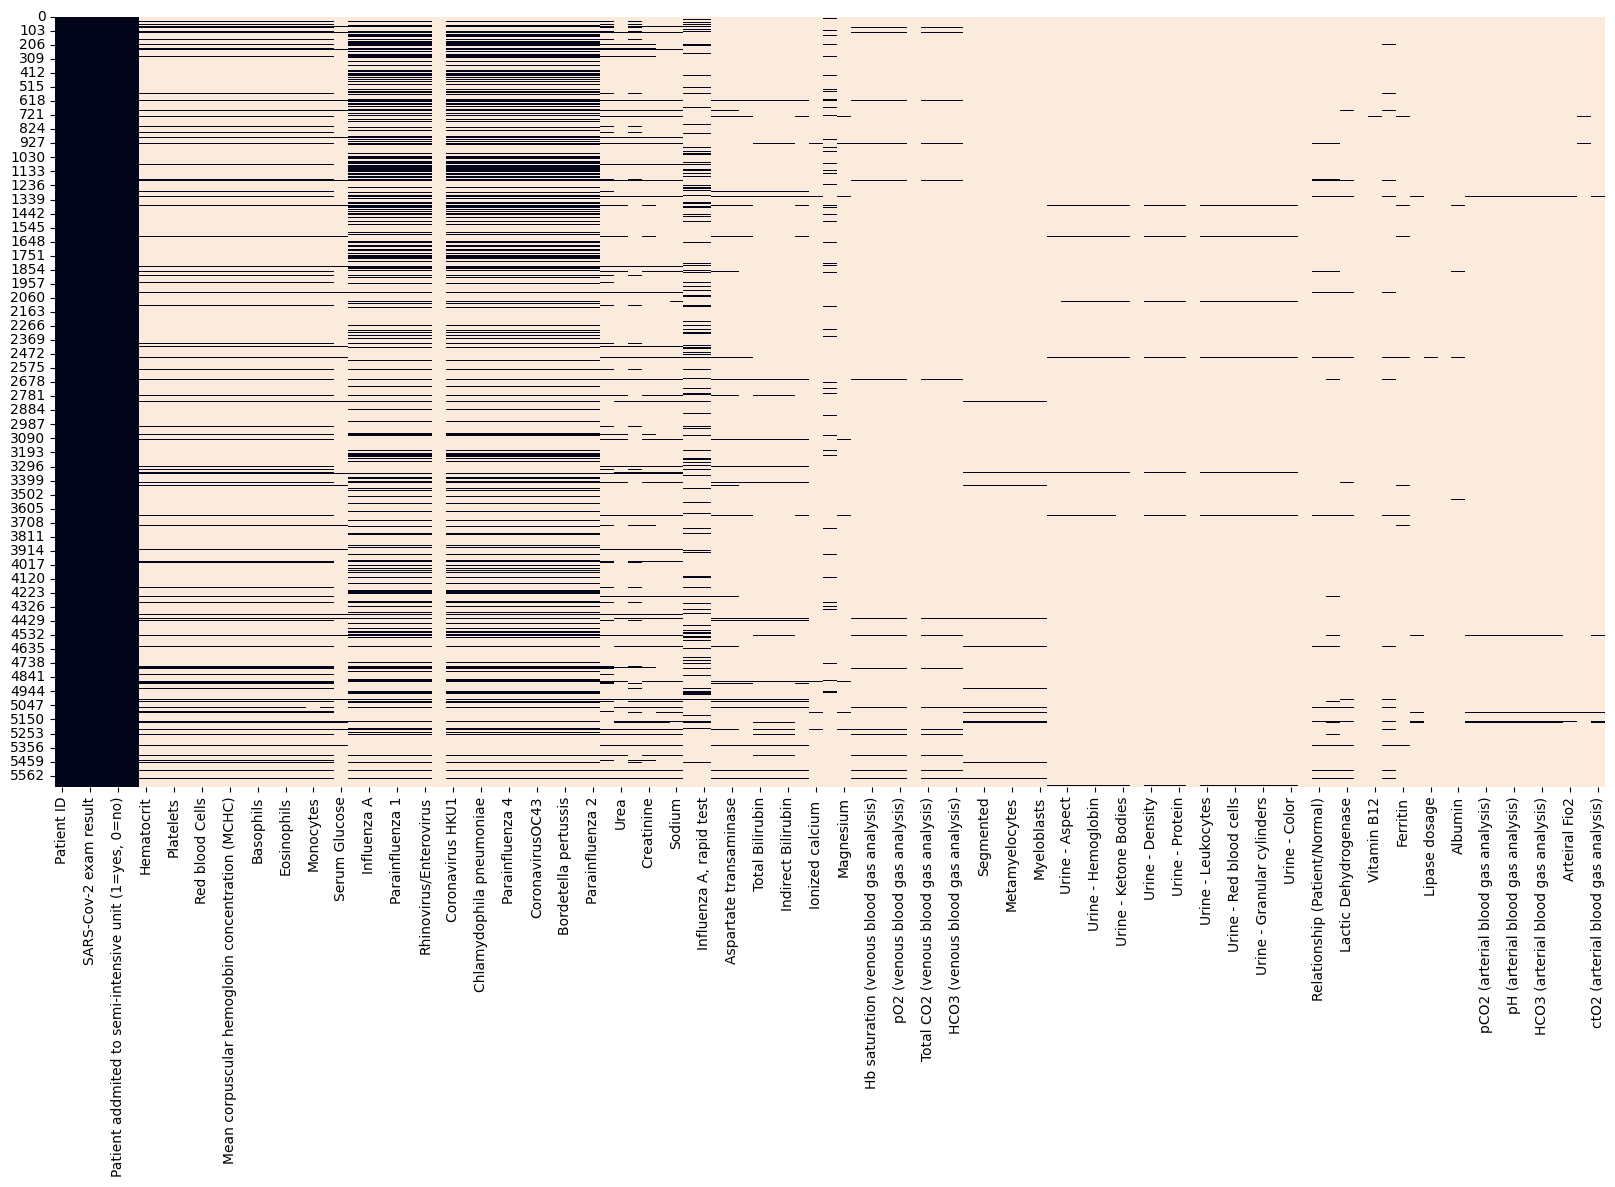

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [12]:
df.isna()

Patient ID  Patient age quantile  SARS-Cov-2 exam result  \
0          False                 False                   False   
1          False                 False                   False   
2          False                 False                   False   
3          False                 False                   False   
4          False                 False                   False   
...          ...                   ...                     ...   
5639       False                 False                   False   
5640       False                 False                   False   
5641       False                 False                   False   
5642       False                 False                   False   
5643       False                 False                   False   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   
...                                              ...   
5639                                           False   
5640                                           False   
5641                                           False   
5642                                           False   
5643                                           False   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                 False       
1                                                 False       
2                                                 False       
3                                                 False       
4                                                 False       
...                                                 ...       
5639                                              False       
5640                                              False       
5641                                              False       
5642                                              False       
5643                                              False       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                 False            True   
1                                                 False           False   
2                                                 False            True   
3                                                 False            True   
4                                                 False            True   
...                                                 ...             ...   
5639                                              False            True   
5640                                              False            True   
5641                                              False            True   
5642                                              False            True   
5643                                              False           False   

      Hemoglobin  Platelets  Mean platelet volume   ...  \
0           True       True                   True  ...   
1          False      False                  False  ...   
2           True       True                   True  ...   
3           True       True                   True  ...   
4           True       True                   True  ...   
...          ...        ...                    ...  ...   
5639        True       True                   True  ...   
5640        True       True                   True  ...   
5641        True       True                   True  ...   
5642        True       True                   True  ...   
5643       False      False                  False  ...   

      Hb saturation (arterial blood gases)  \
0                                     True   
1                                     True   
2                                  

In [13]:
(df.isna().sum()/df.shape[0]).sort_values()

Patient ID                                               0.0
Patient age quantile                                     0.0
SARS-Cov-2 exam result                                   0.0
Patient addmited to regular ward (1=yes, 0=no)           0.0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.0
                                                        ... 
Mycoplasma pneumoniae                                    1.0
Urine - Sugar                                            1.0
Prothrombin time (PT), Activity                          1.0
Partial thromboplastin time (PTT)                        1.0
D-Dimer                                                  1.0
Length: 111, dtype: float64

# Analyse du Fond

## 1. Visulation initiale - Elimination des colonnes inutiles

In [14]:
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.9]]
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...    Adenovirus  \
0         NaN        NaN                    NaN  ...           NaN   
1    -0.02234  -0.517413               0.010677  ...  not_detected   
2         NaN        NaN                    NaN  ...           NaN   
3         NaN        NaN                    NaN  ...           NaN   
4         NaN        NaN                    NaN  ...  not_detected   

   Parainfluenza 4  Coronavirus229E  CoronavirusOC43  Inf A H1N1 2009  \
0              NaN              NaN              NaN              NaN   
1     not_detected     not_detected     not_detected     not_detected   
2              NaN              NaN              NaN              NaN   
3              NaN              NaN              NaN              NaN   
4     not_detected     not_detected     not_detected     not_detected   

   Bordetella pertussis  Metapneumovirus  Parainfluenza 2  \
0                   NaN              NaN              NaN   
1          not_detected     not_detected     not_detected   
2                   NaN              NaN              NaN   
3                   NaN              NaN              NaN   
4          not_detected     not_detected     not_detected   

   Influenza B, rapid test  Influenza A, rapid test  
0                      NaN                      NaN  
1                 negative                 negative  
2                      NaN                      NaN  
3                      NaN                      NaN  
4                      NaN                      NaN  

[5 rows x 39 columns]

<Axes: >

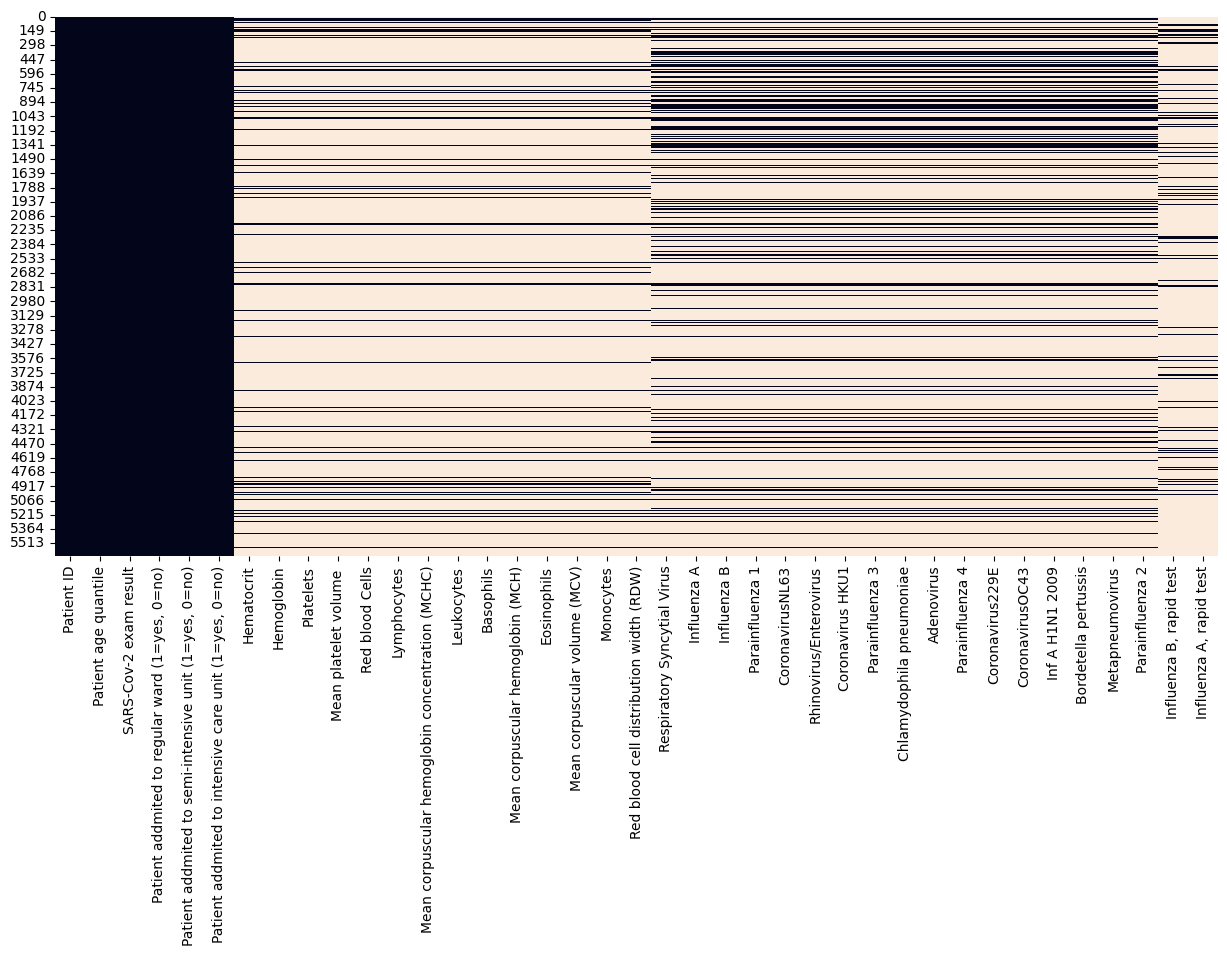

In [15]:
plt.figure(figsize=(15,7))
sns.heatmap(df.isna(), cbar=False)

In [16]:
df = df.drop('Patient ID',axis=1) 

In [17]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
0         NaN        NaN                    NaN              NaN  ...   
1    -0.02234  -0.517413               0.010677         0.102004  ...   
2         NaN        NaN                    NaN              NaN  ...   
3         NaN        NaN                    NaN              NaN  ...   
4         NaN        NaN                    NaN              NaN  ...   

     Adenovirus  Parainfluenza 4  Coronavirus229E  CoronavirusOC43  \
0           NaN              NaN              NaN              NaN   
1  not_detected     not_detected     not_detected     not_detected   
2           NaN              NaN              NaN              NaN   
3           NaN              NaN              NaN              NaN   
4  not_detected     not_detected     not_detected     not_detected   

   Inf A H1N1 2009  Bordetella pertussis  Metapneumovirus  Parainfluenza 2  \
0              NaN                   NaN              NaN              NaN   
1     not_detected          not_detected     not_detected     not_detected   
2              NaN                   NaN              NaN              NaN   
3              NaN                   NaN              NaN              NaN   
4     not_detected          not_detected     not_detected     not_detected   

   Influenza B, rapid test Influenza A, rapid test  
0                      NaN                     NaN  
1                 negative                negative  
2                      NaN                     NaN  
3                      NaN                     NaN  
4                      NaN                     NaN  

[5 rows x 38 columns]

## Examen de la colonne target

In [18]:
df['SARS-Cov-2 exam result'].value_counts()

SARS-Cov-2 exam result
negative    5086
positive     558
Name: count, dtype: int64

C:\Users\melyo\AppData\Local\Temp\ipykernel_5984\762589671.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[k])
C:\Users\melyo\AppData\Local\Temp\ipykernel_5984\762589671.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[k])
C:\Users\melyo\AppData\Local\Temp\ipykernel_5984\762589671.p

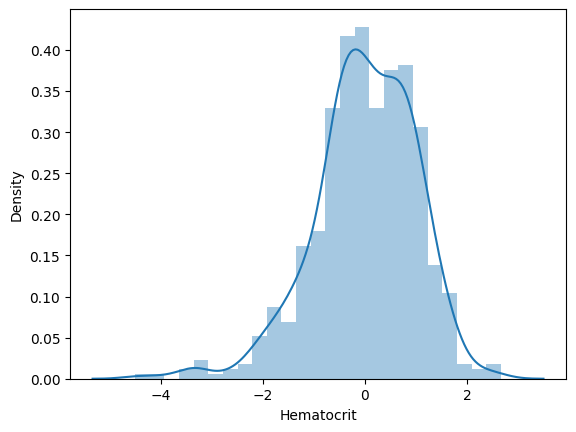

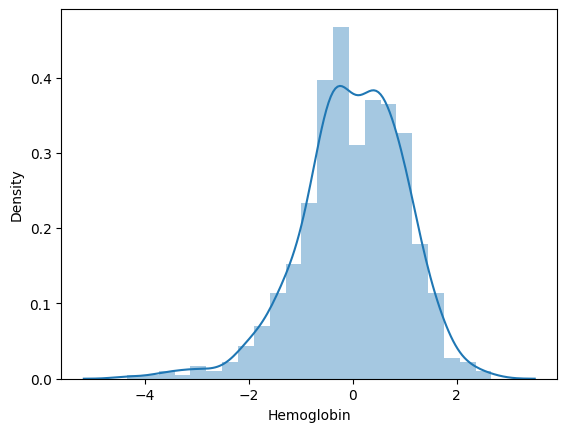

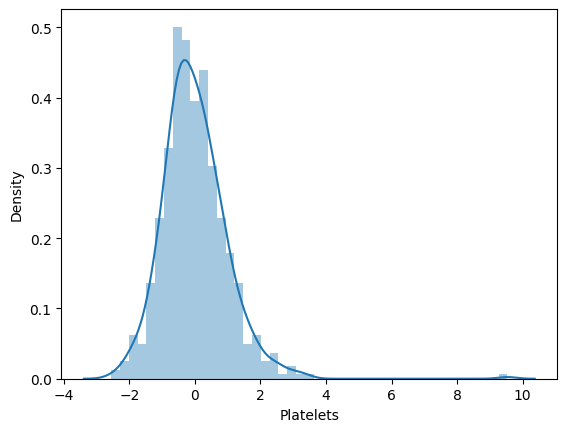

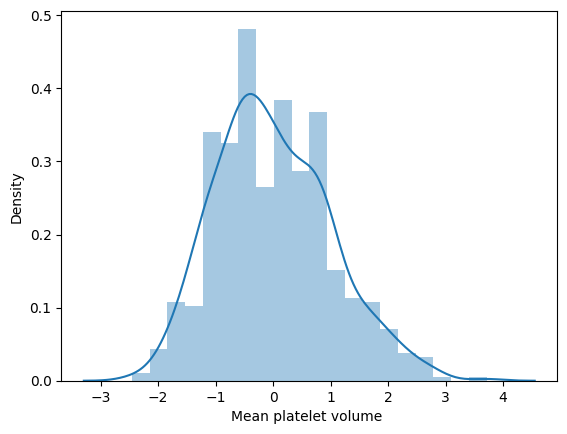

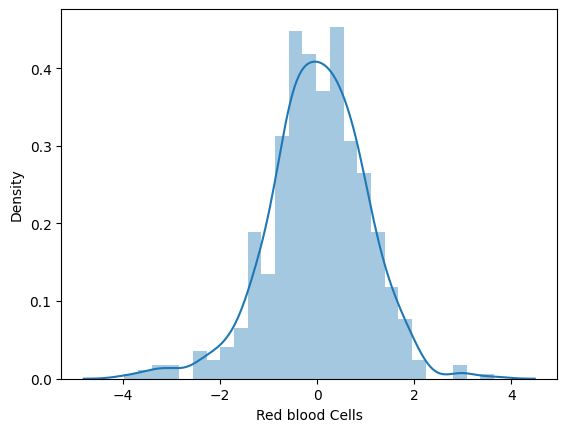

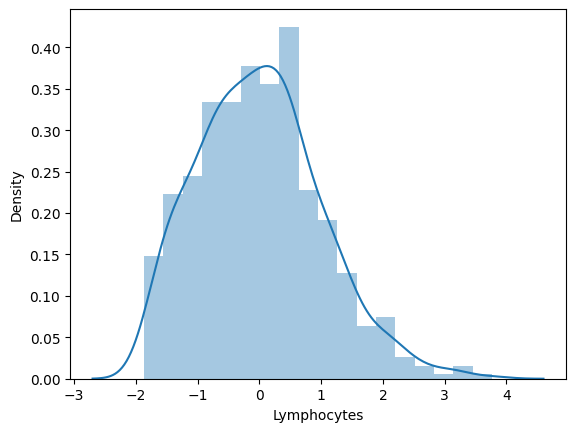

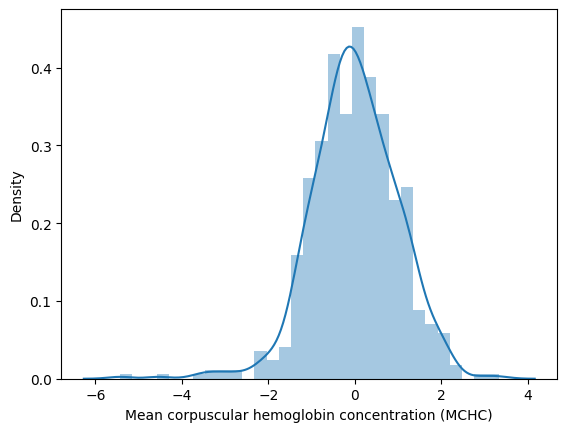

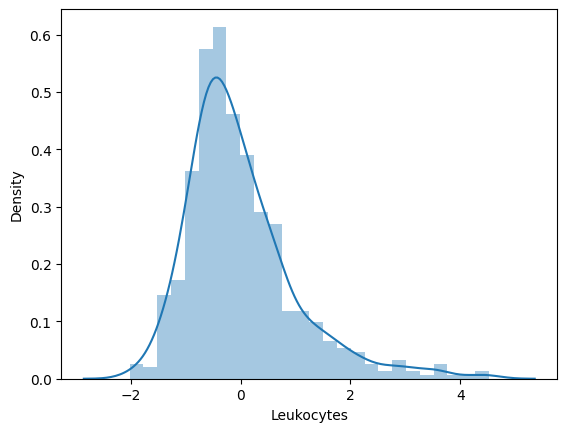

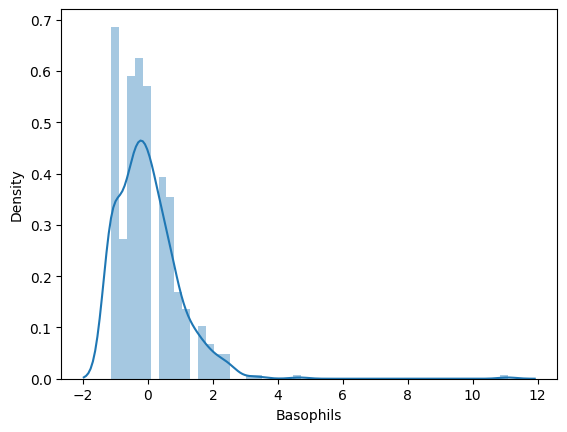

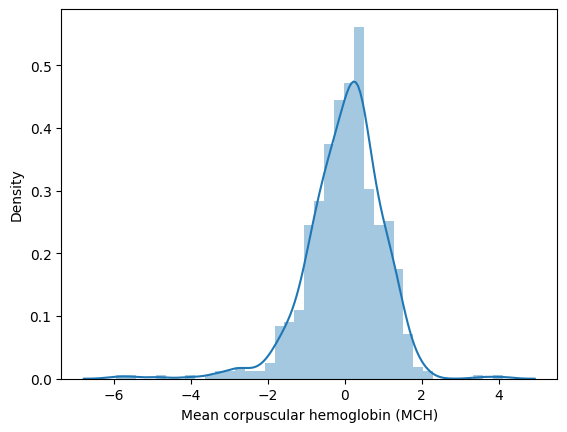

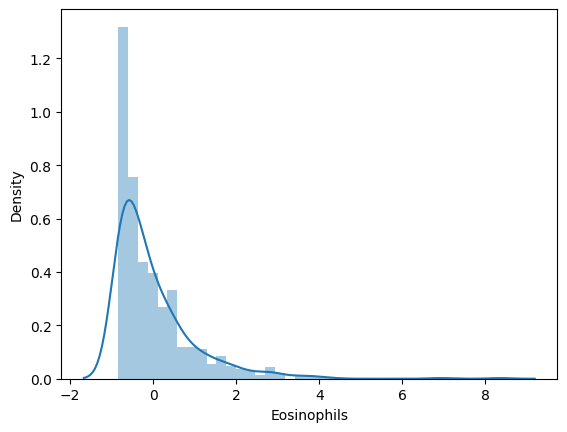

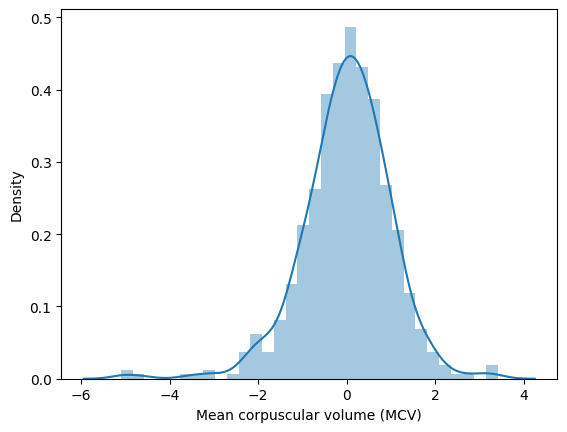

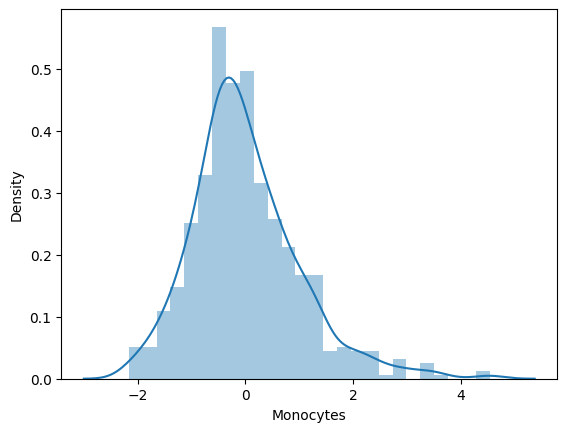

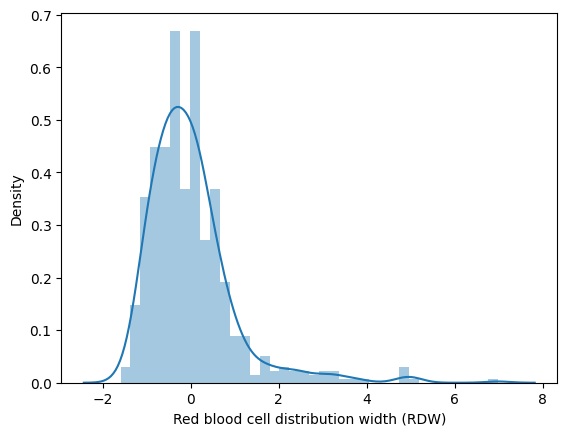

In [19]:
for k in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[k])

In [20]:
df['Patient age quantile'].value_counts()

Patient age quantile
11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: count, dtype: int64

C:\Users\melyo\AppData\Local\Temp\ipykernel_5984\997927388.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Patient age quantile'])


<Axes: xlabel='Patient age quantile', ylabel='Density'>

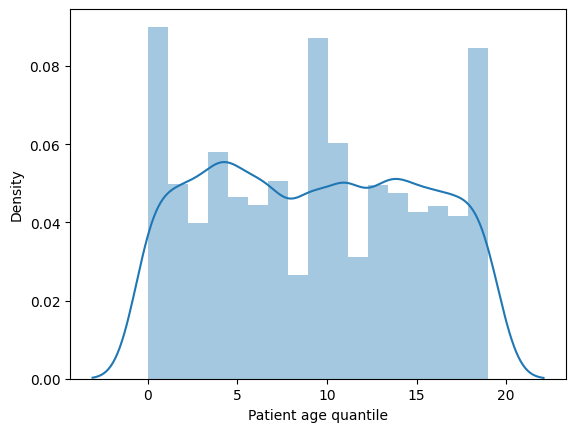

In [21]:
plt.figure()
sns.distplot(df['Patient age quantile'])

## Variables Qualitatives

In [22]:
for k in df.select_dtypes('object'):
    print(f'{k :-<50} {df[k].unique()}')

SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus2

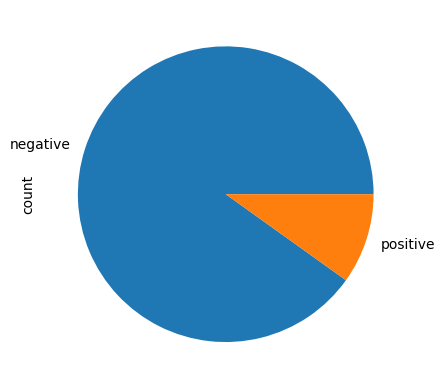

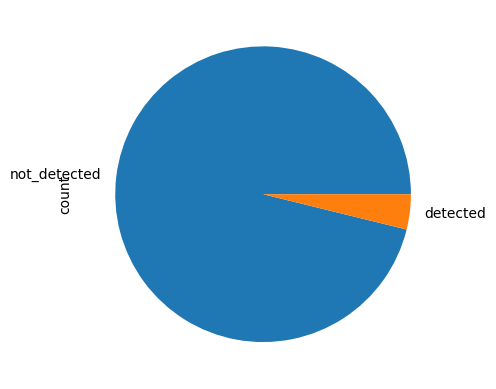

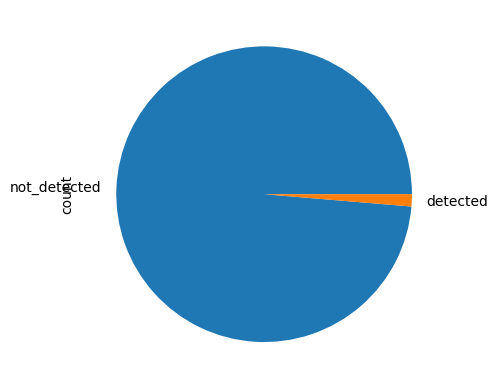

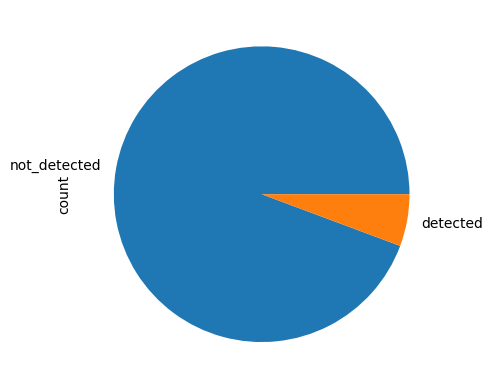

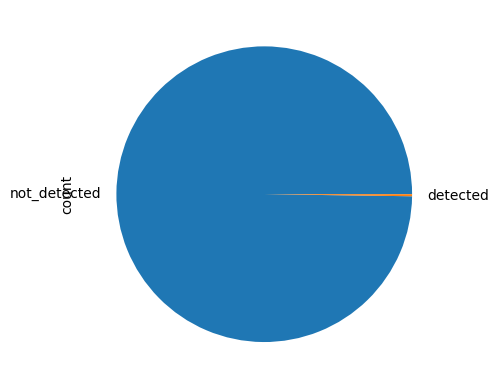

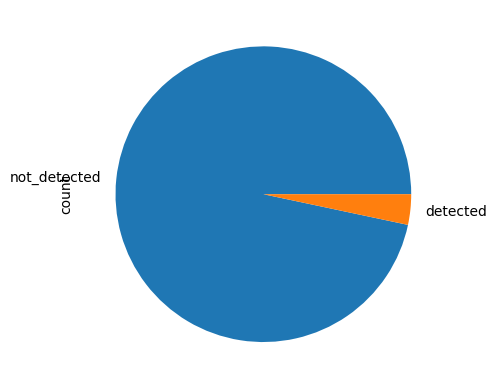

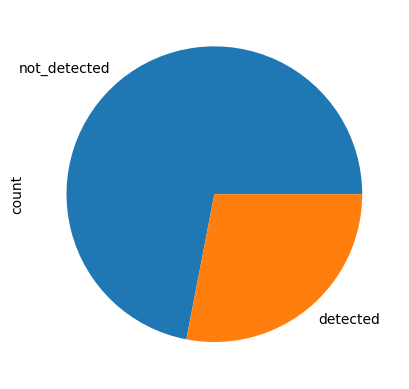

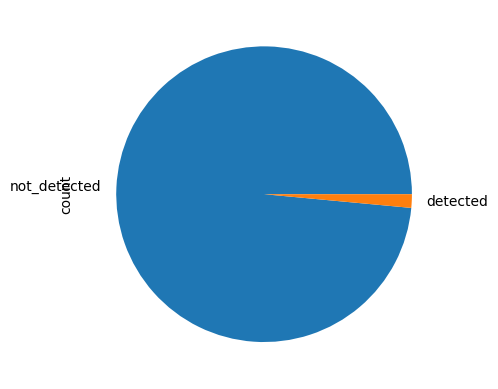

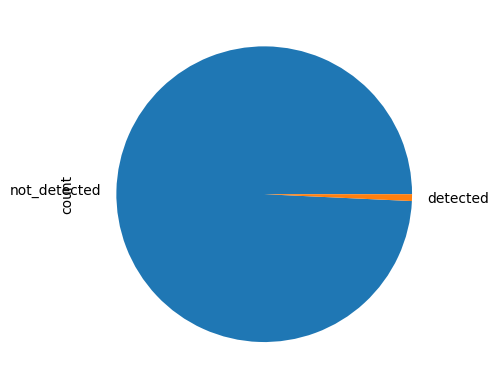

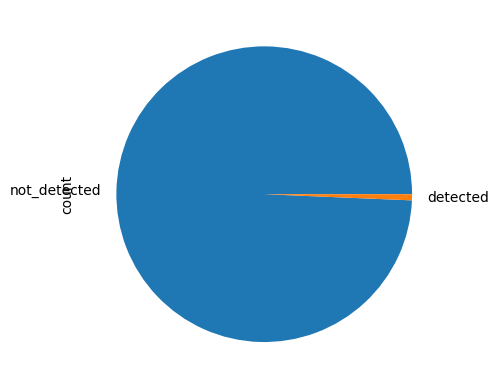

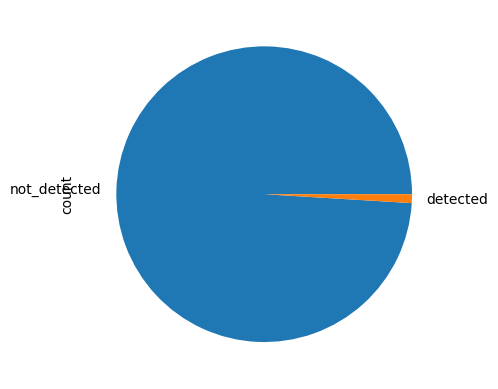

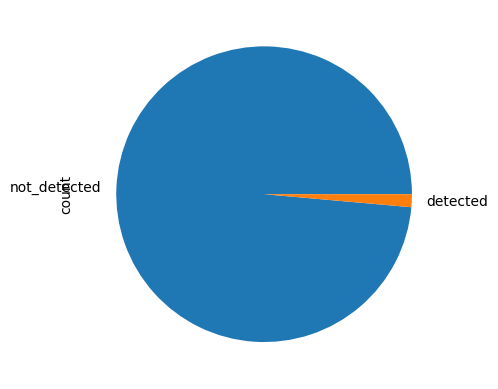

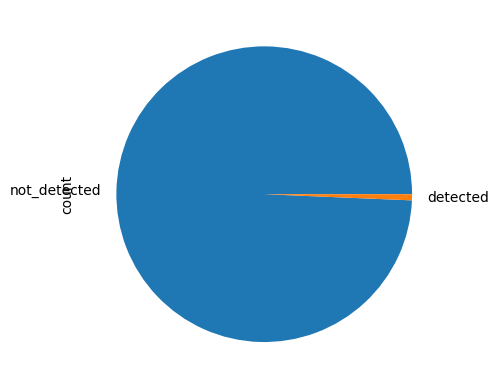

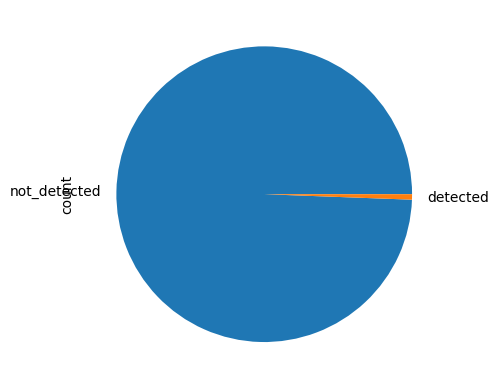

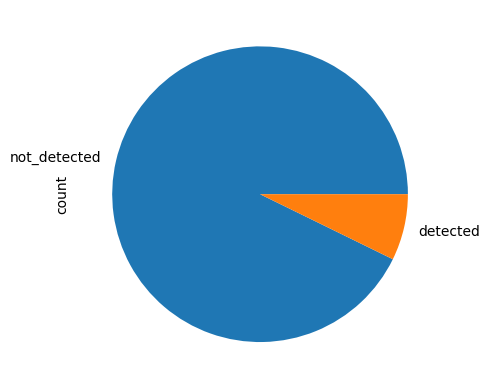

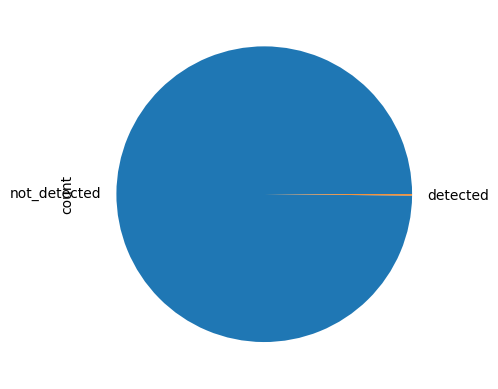

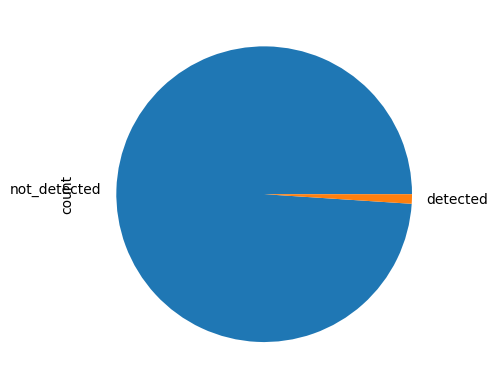

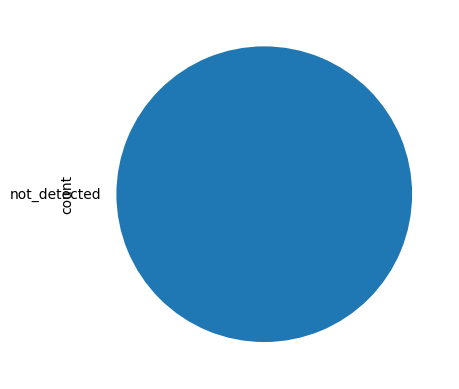

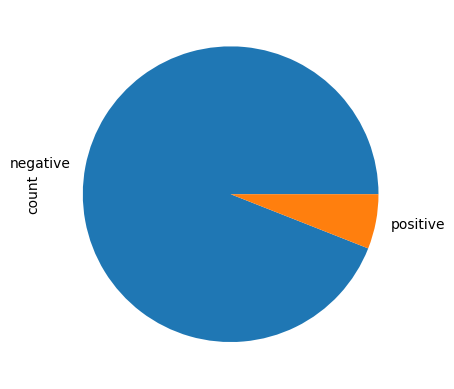

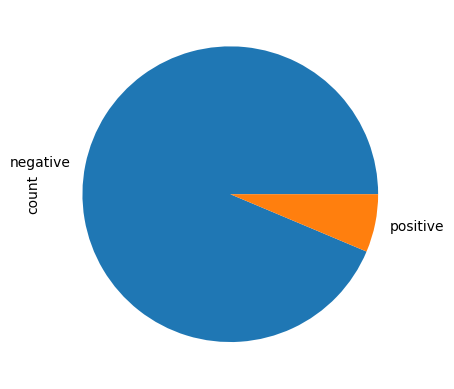

In [23]:
for k in df.select_dtypes('object'):
    plt.figure()
    df[k].value_counts().plot.pie()

## Relation Target / Variables

### Création de sous-ensembles positifs et négatifs

In [24]:
df_postive = df[df['SARS-Cov-2 exam result'] == 'positive'] 
df_negative =df[ df['SARS-Cov-2 exam result'] == 'negative' ]


In [25]:
missing_rate = df.isna().sum()/df.shape[0]

In [26]:
blood_columns = df.columns[(missing_rate <0.9) & (missing_rate >0.88)]
viral_columns = df.columns[(missing_rate <0.88) & (missing_rate >0.75)]

### Target / Blood

C:\Users\melyo\AppData\Local\Temp\ipykernel_5984\2355568202.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_postive[k], label='postive')
C:\Users\melyo\AppData\Local\Temp\ipykernel_5984\2355568202.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_negative[k],label='negative')
C:\User

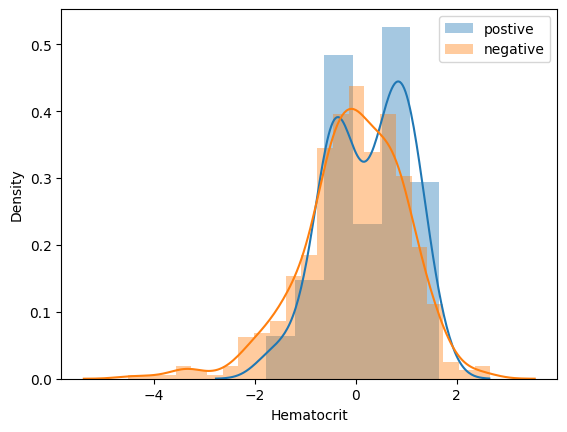

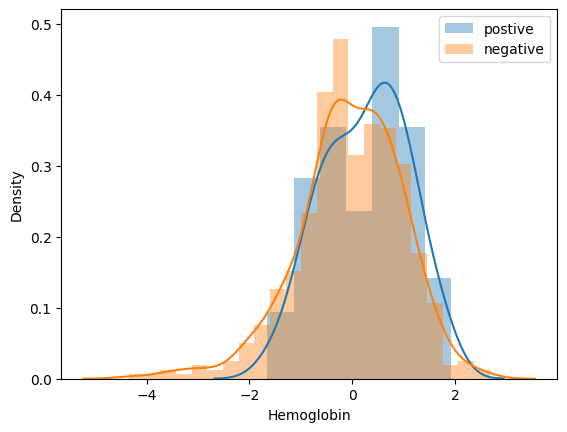

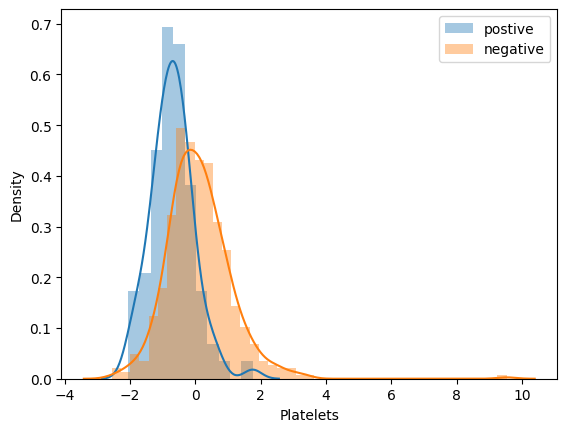

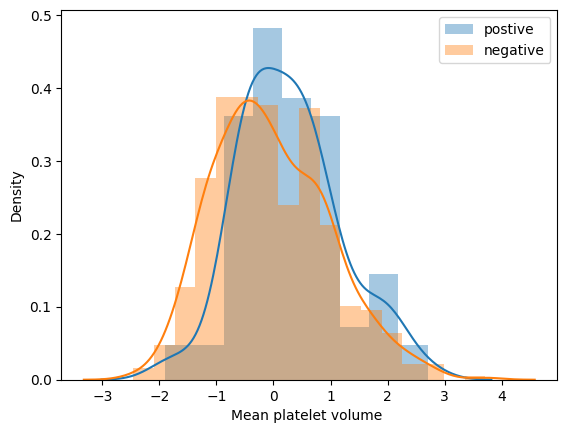

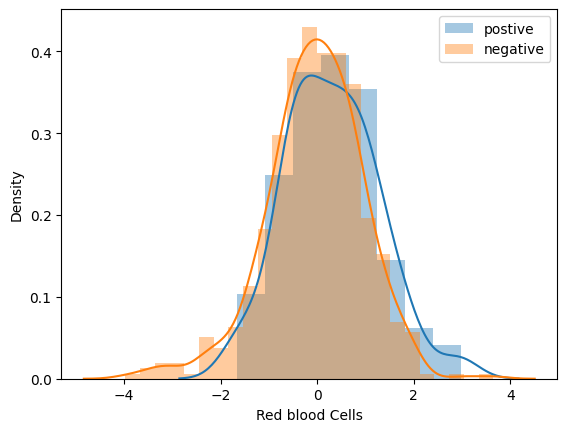

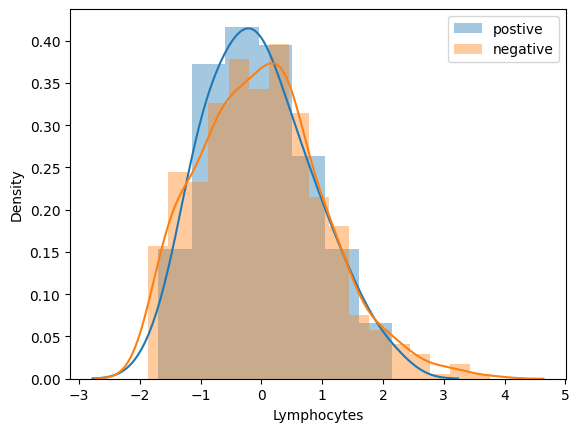

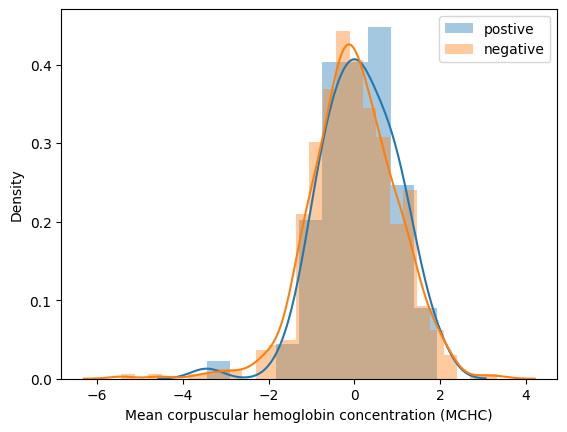

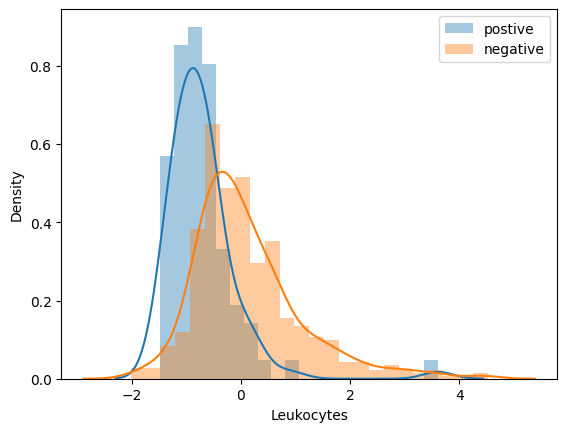

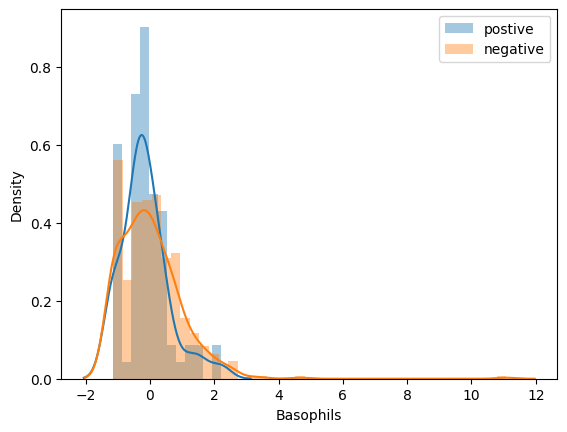

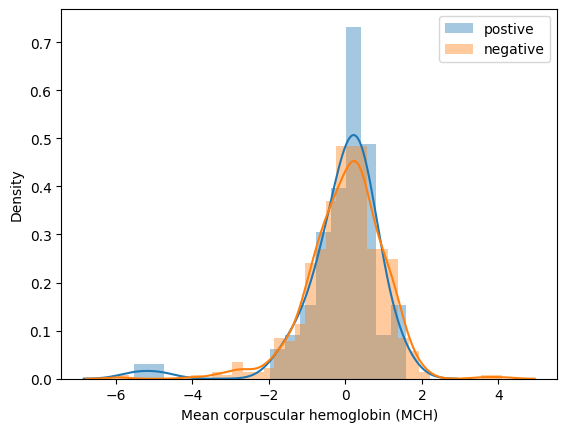

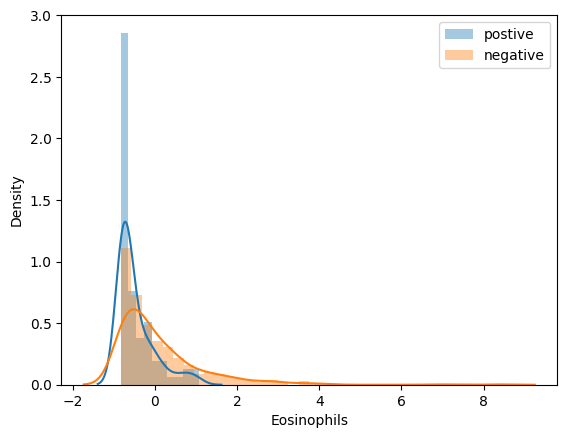

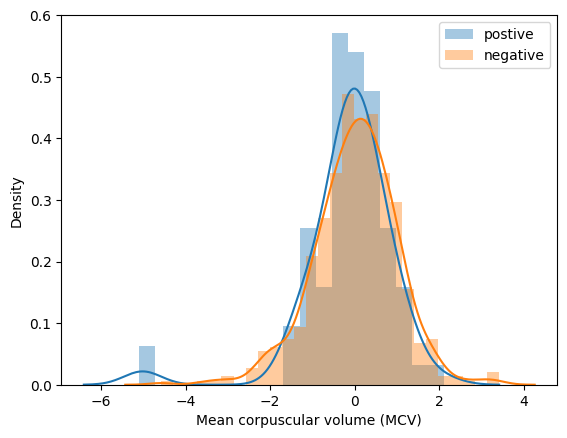

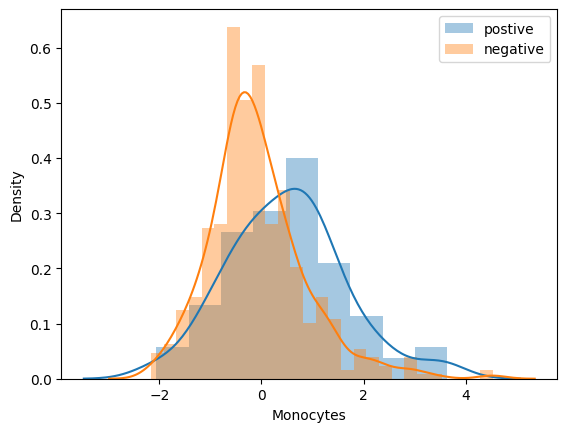

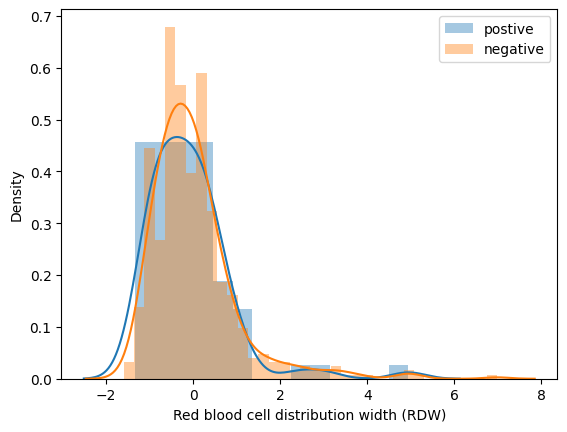

In [27]:
for k in blood_columns :
    plt.figure()
    sns.distplot(df_postive[k], label='postive')
    sns.distplot(df_negative[k],label='negative')
    plt.legend()

### Relation Target / age

<Axes: xlabel='Patient age quantile', ylabel='count'>

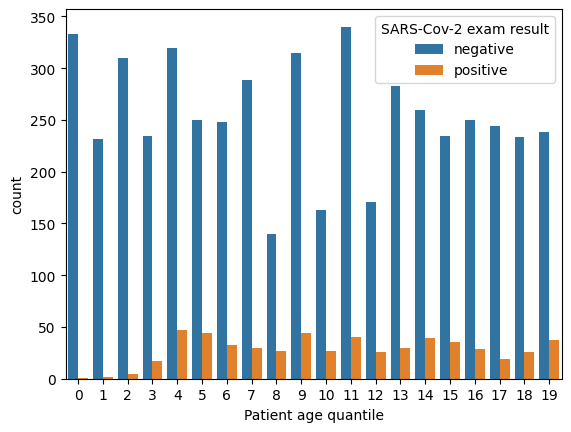

In [28]:
sns.countplot(x='Patient age quantile' , hue ='SARS-Cov-2 exam result' , data = df)

###  Relation Target / Viral

In [29]:
pd.crosstab(df['SARS-Cov-2 exam result'] ,  df['Influenza A'])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

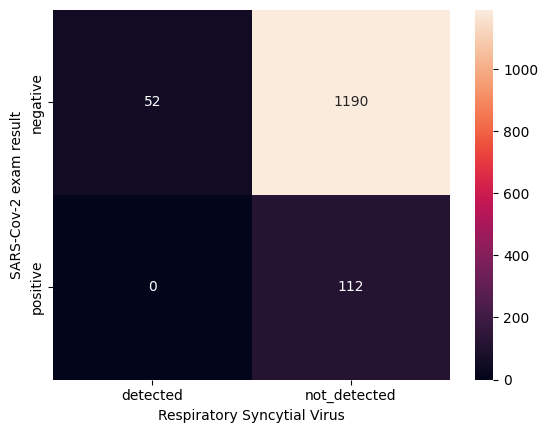

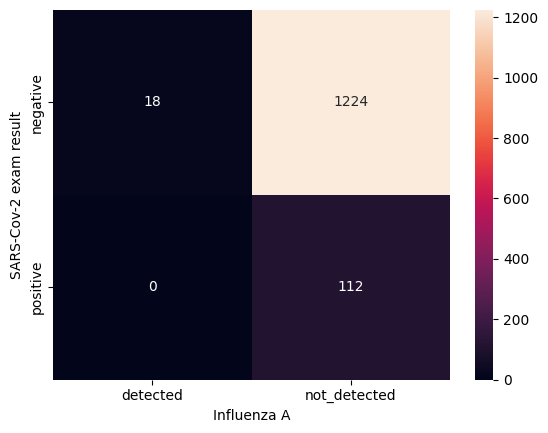

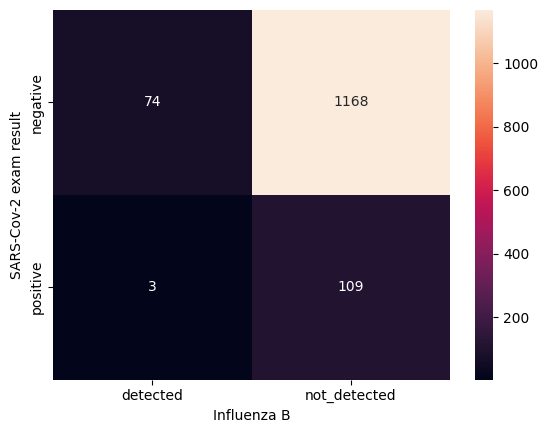

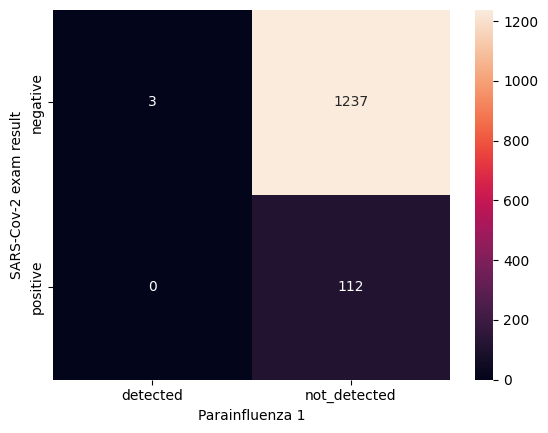

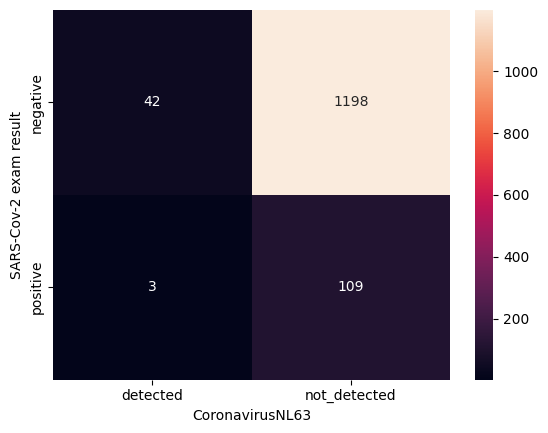

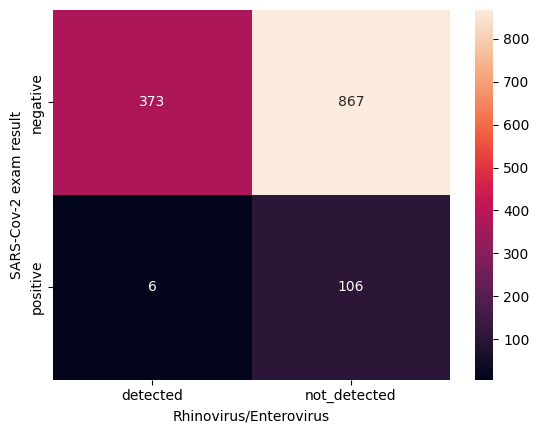

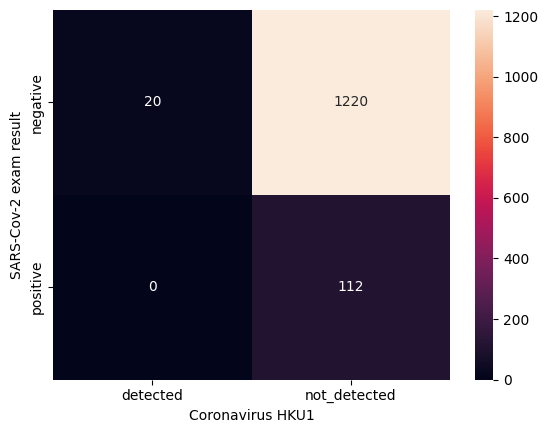

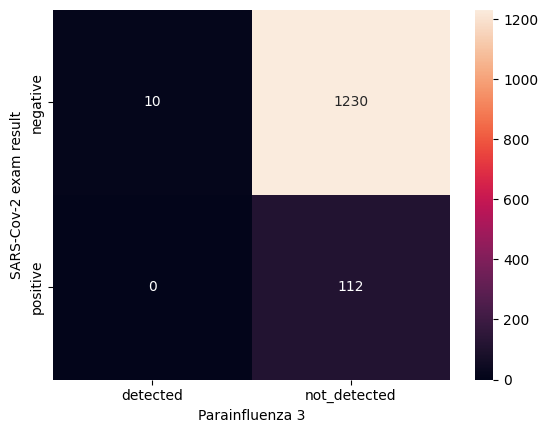

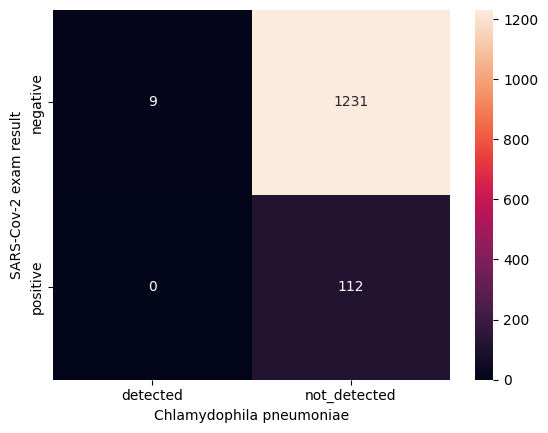

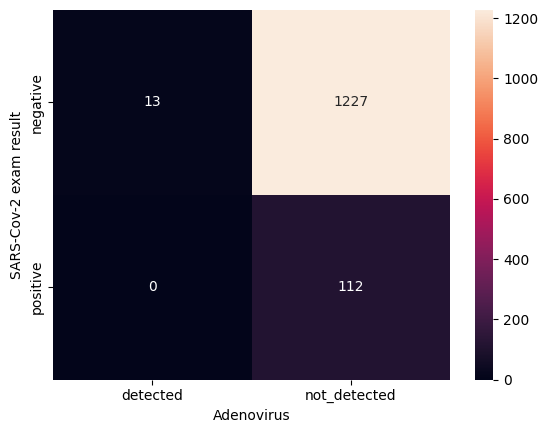

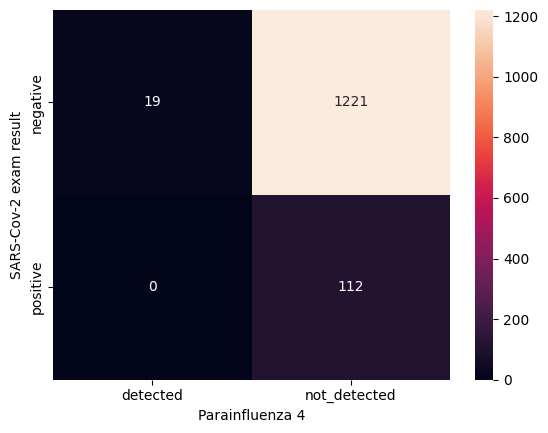

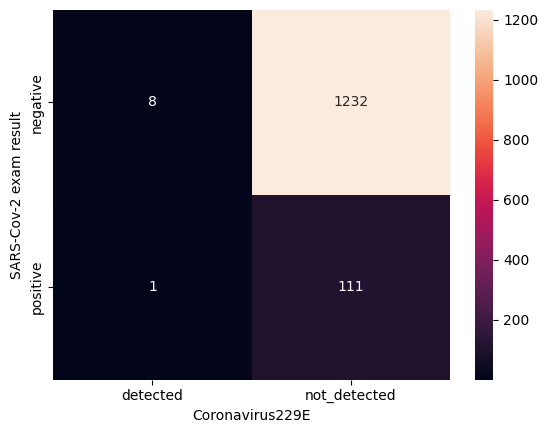

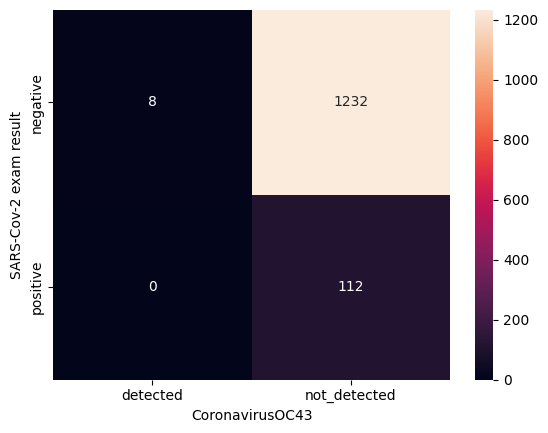

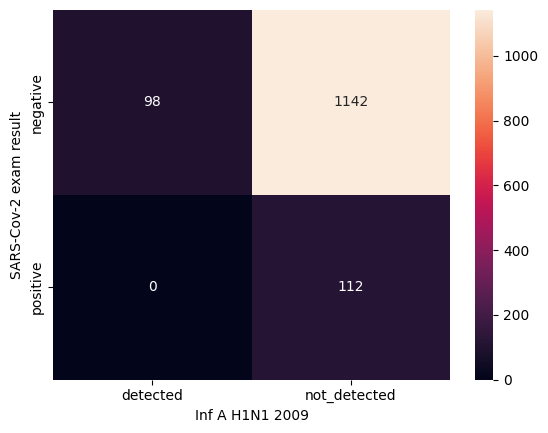

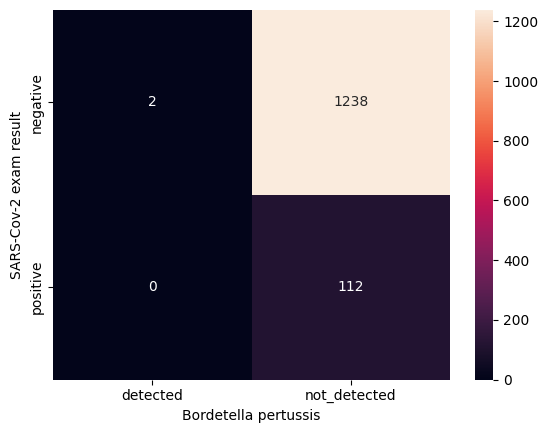

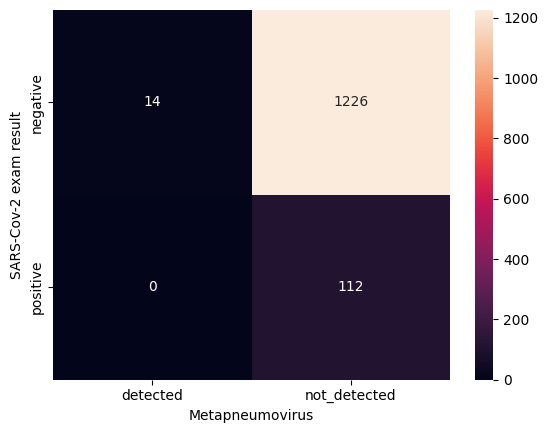

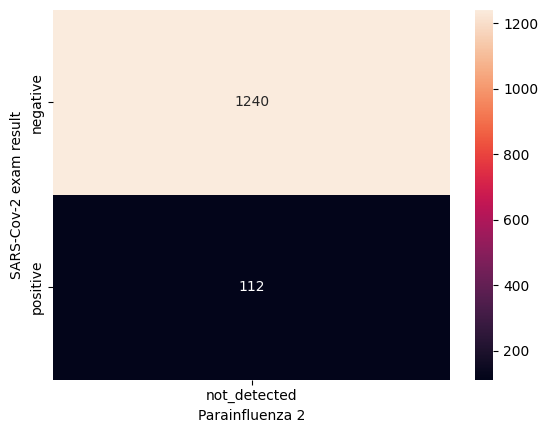

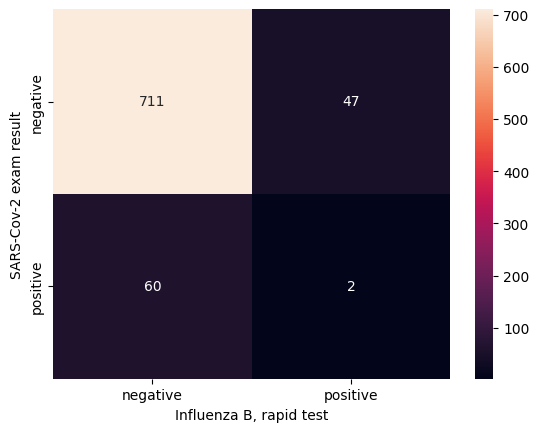

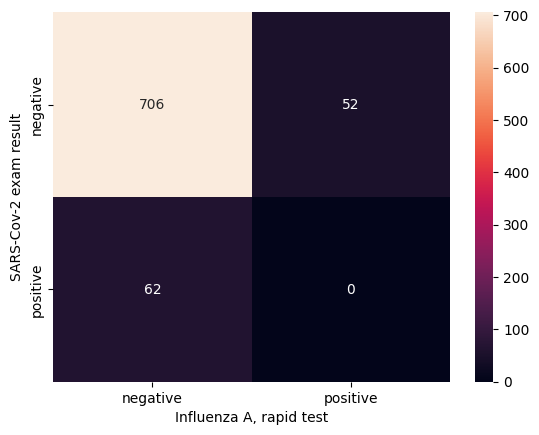

In [30]:
for k in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'],df[k]) , annot=True , fmt='d')

In [31]:
#  missing_rate = df.isna().sum()/df.shape[0]

In [32]:
#    blood_columns = df.columns[(missing_rate <0.9) & (missing_rate >0.88)]
#    viral_columns = df.columns[(missing_rate <0.88) & (missing_rate >0.75)]


## Analyse un peu plus Avancée

### Relation Variables / Variables

#### relations Taux Sanguin

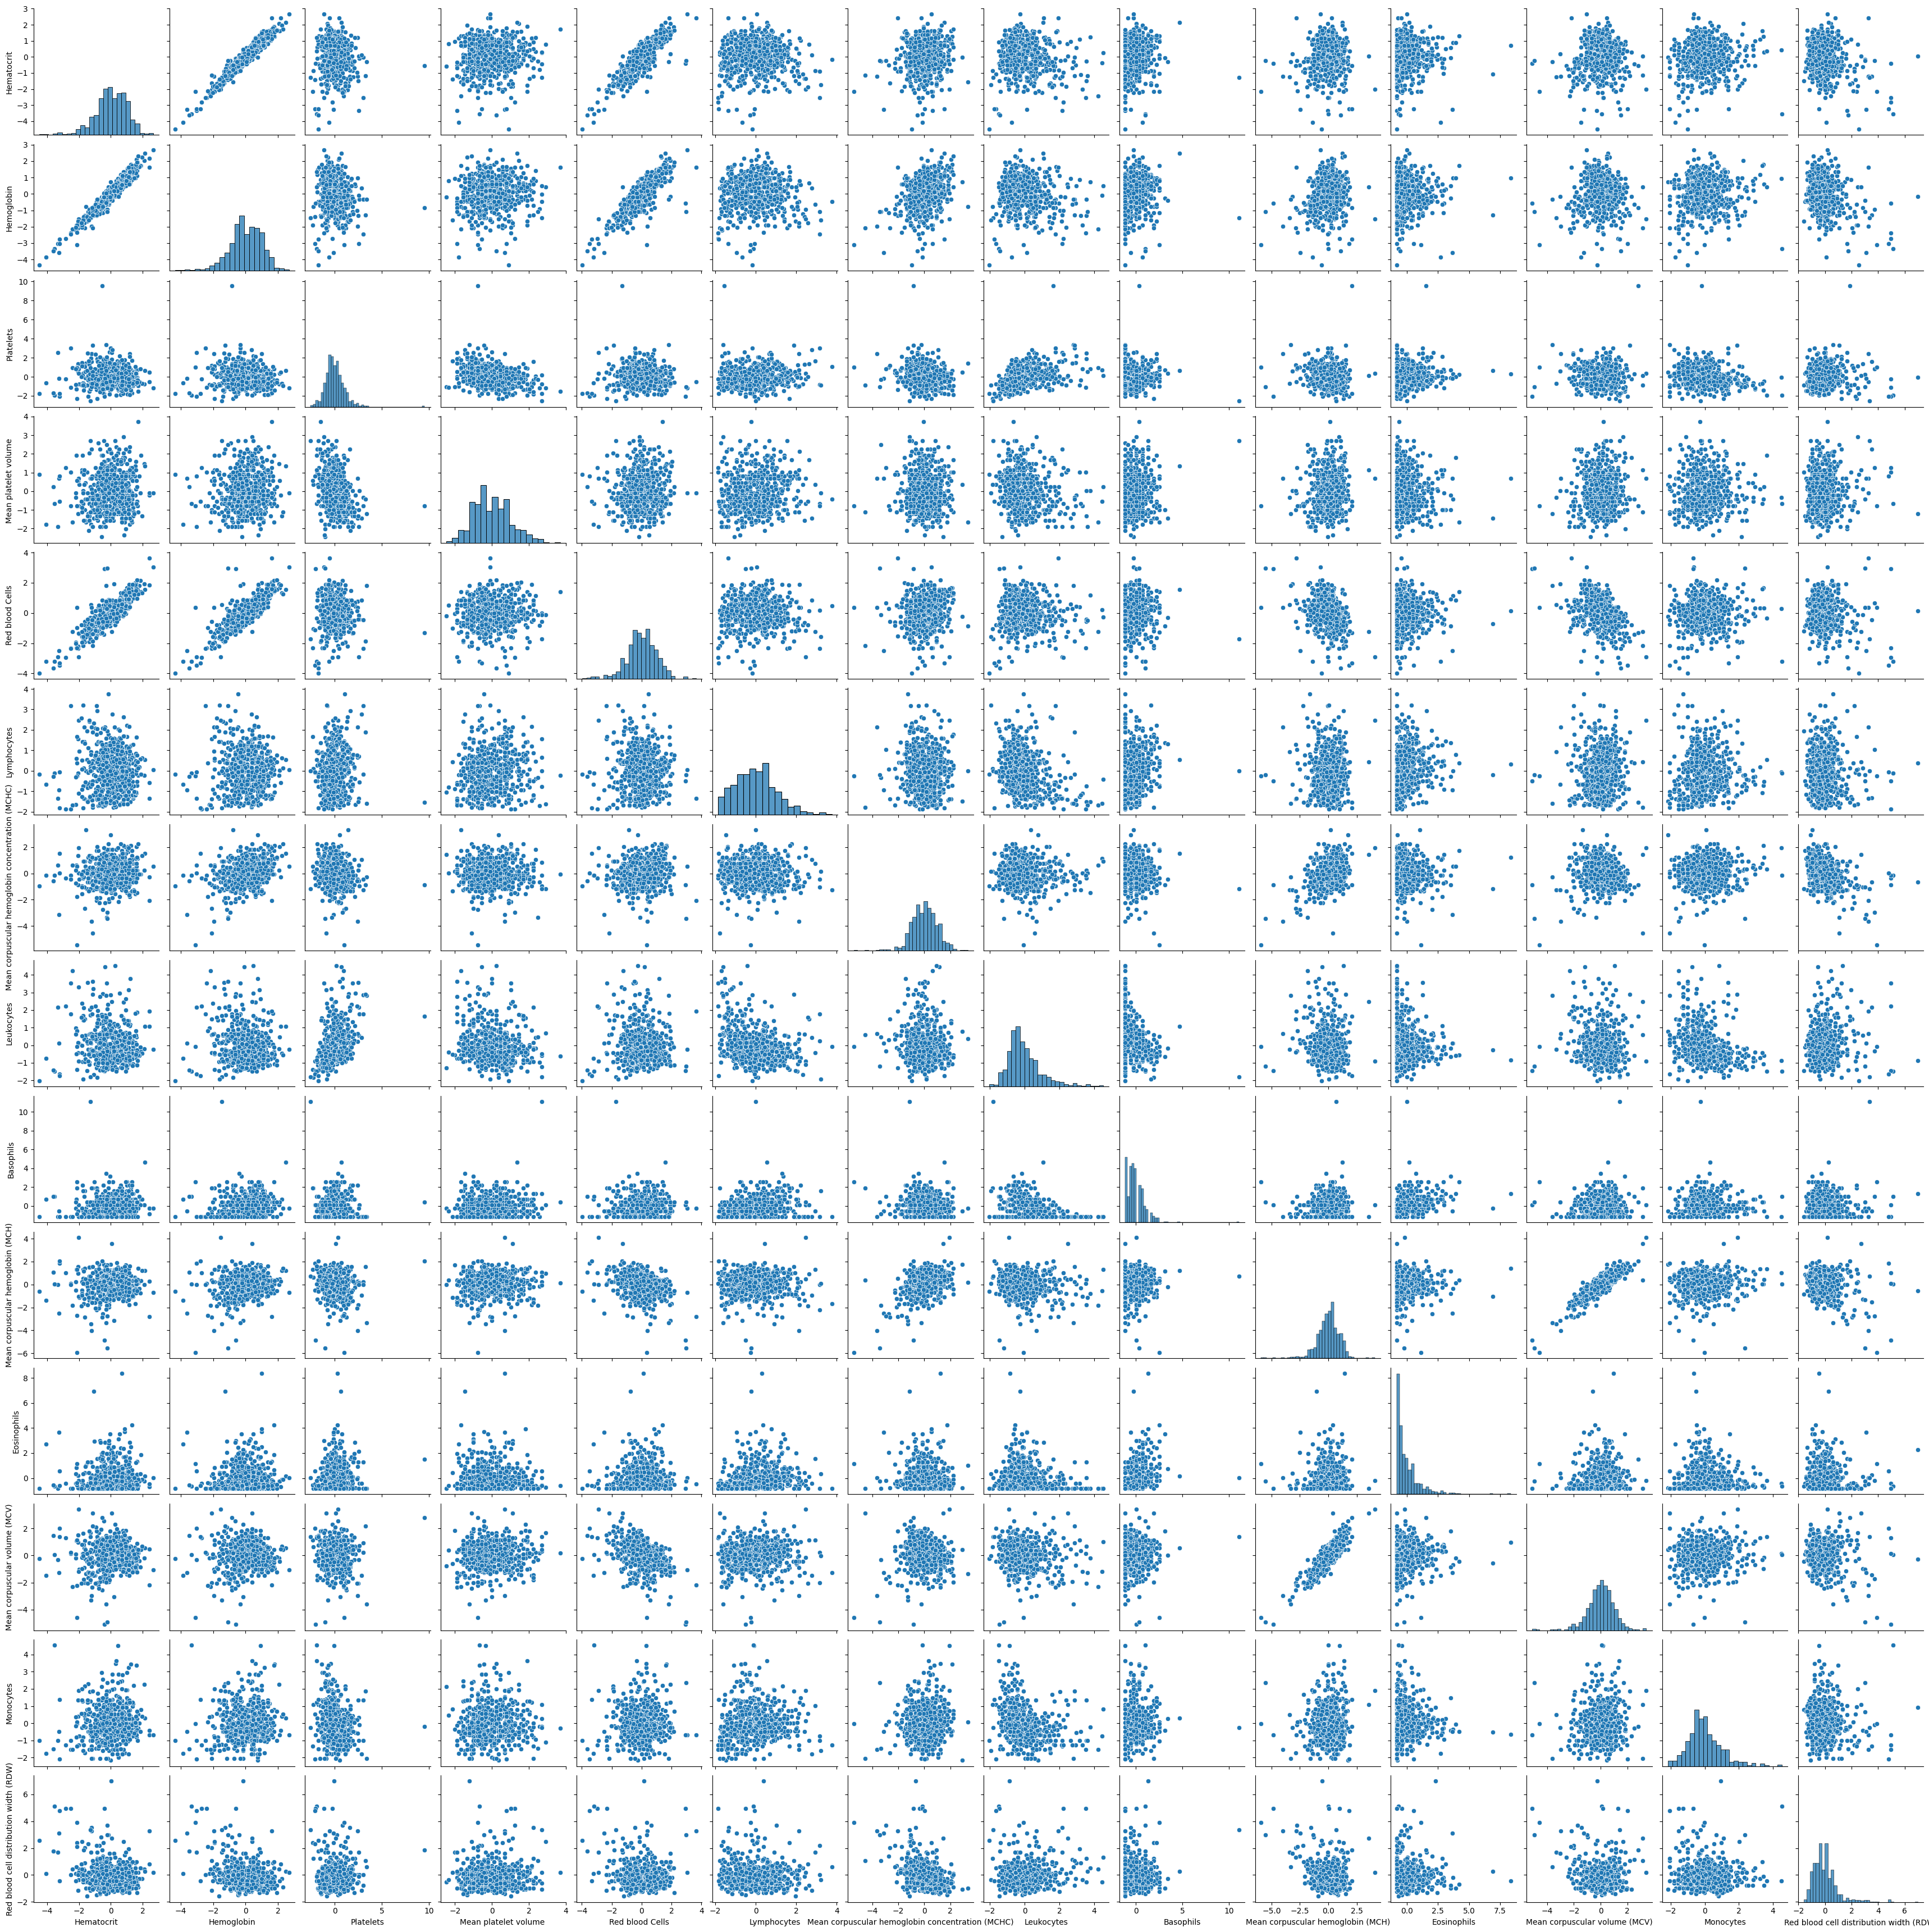

In [33]:
sns.pairplot(df[blood_columns])

<Axes: >

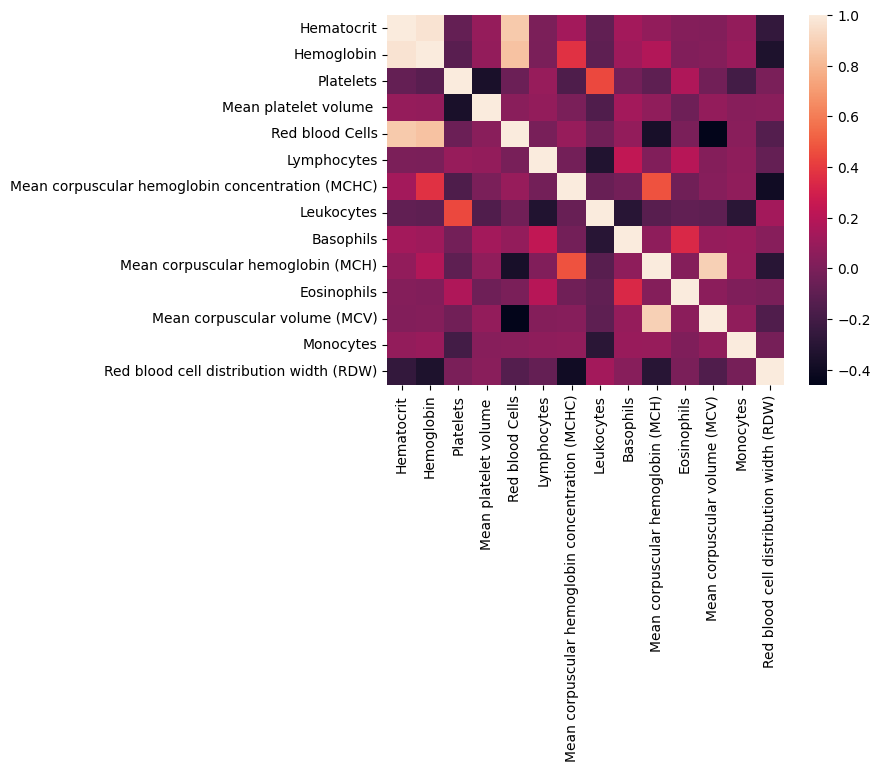

In [34]:
sns.heatmap(df[blood_columns].corr())

### Relation Age / Sang

C:\Users\melyo\AppData\Local\Temp\ipykernel_5984\3631809448.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

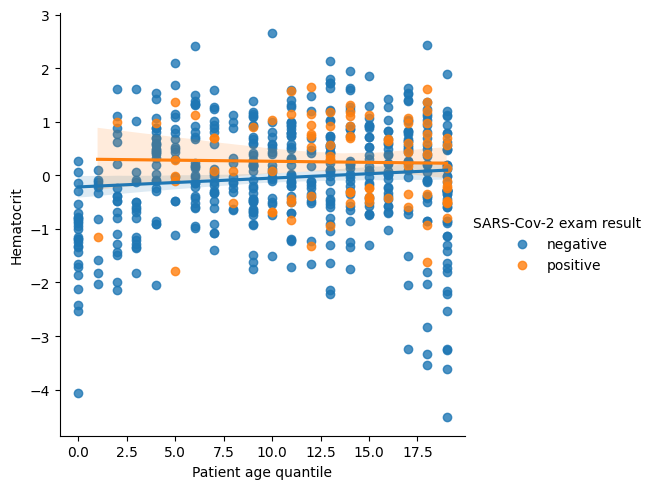

<Figure size 640x480 with 0 Axes>

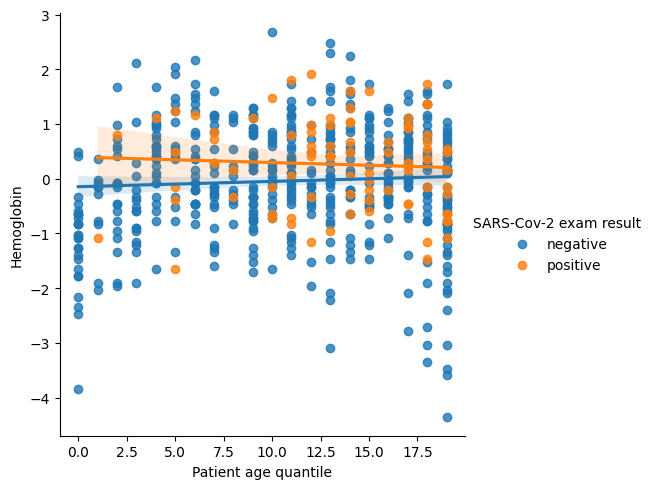

<Figure size 640x480 with 0 Axes>

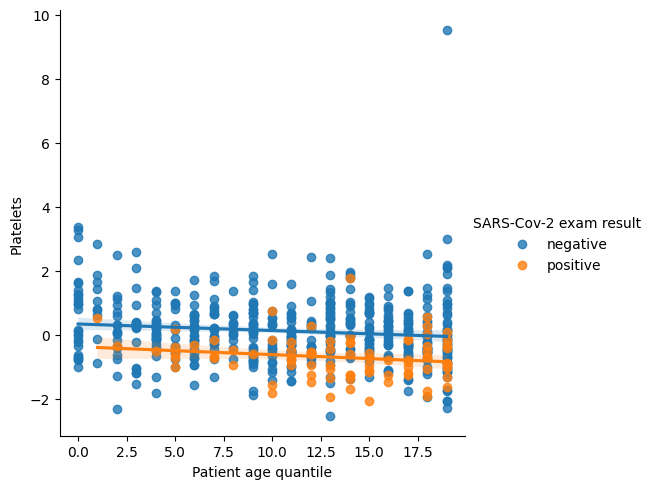

<Figure size 640x480 with 0 Axes>

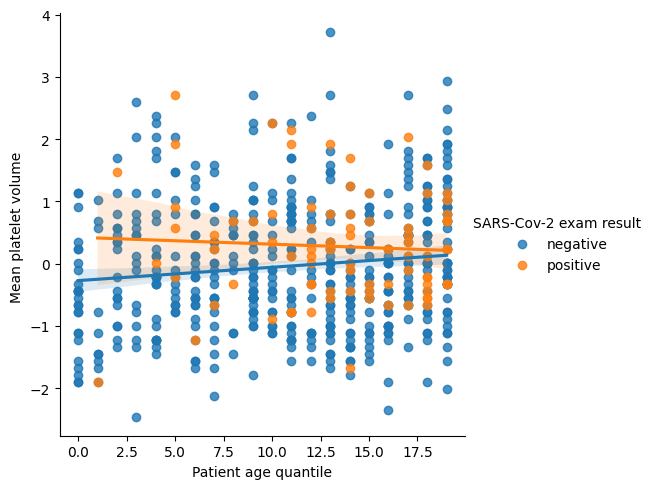

<Figure size 640x480 with 0 Axes>

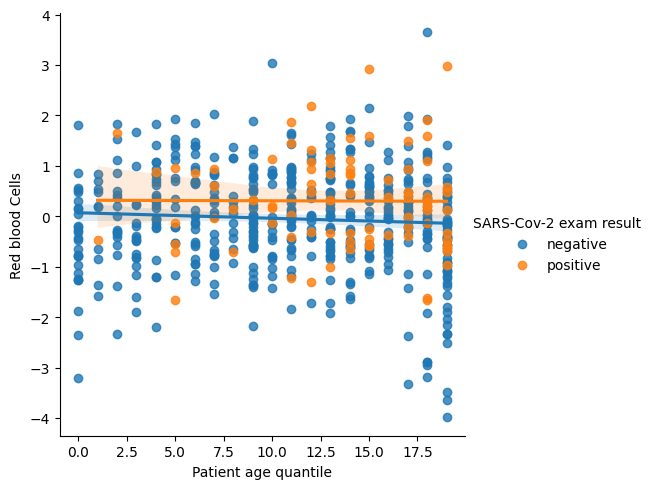

<Figure size 640x480 with 0 Axes>

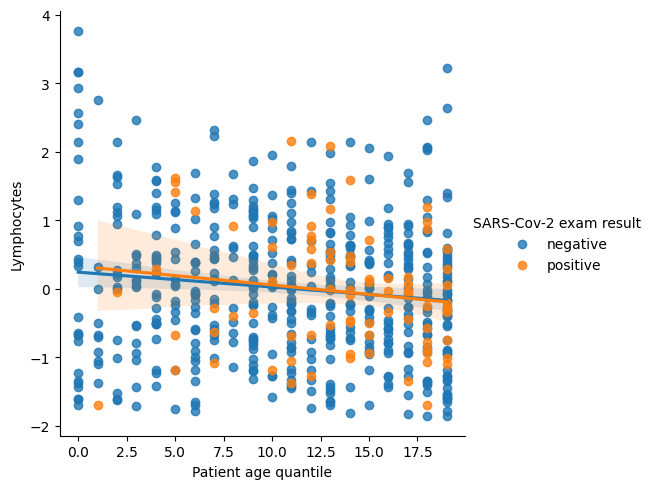

<Figure size 640x480 with 0 Axes>

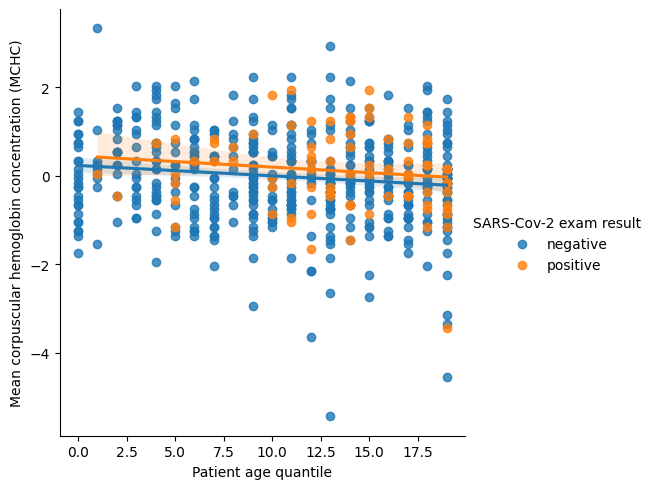

<Figure size 640x480 with 0 Axes>

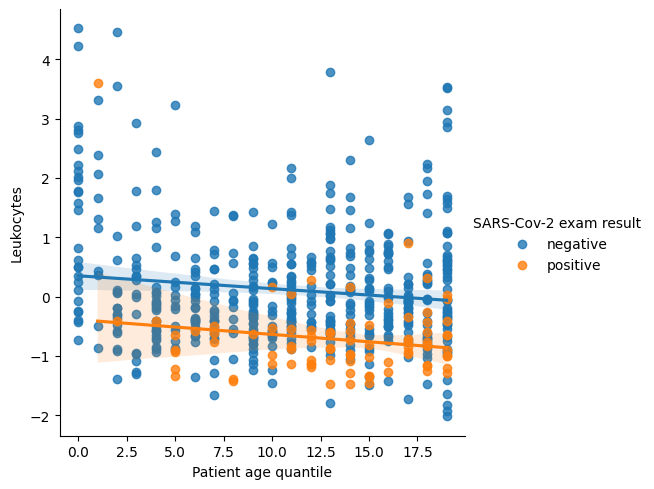

<Figure size 640x480 with 0 Axes>

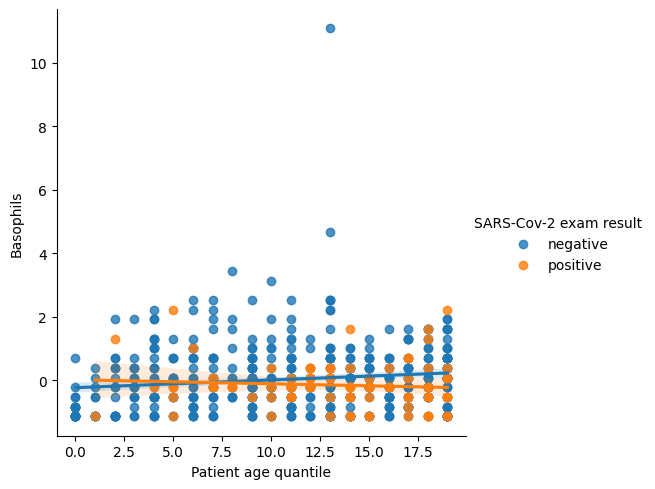

<Figure size 640x480 with 0 Axes>

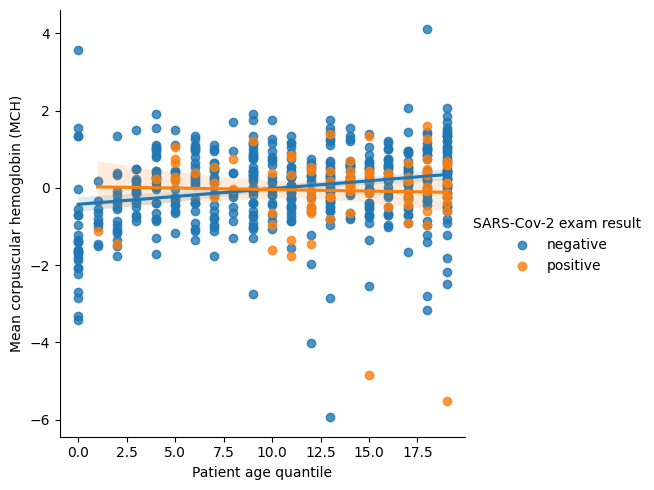

<Figure size 640x480 with 0 Axes>

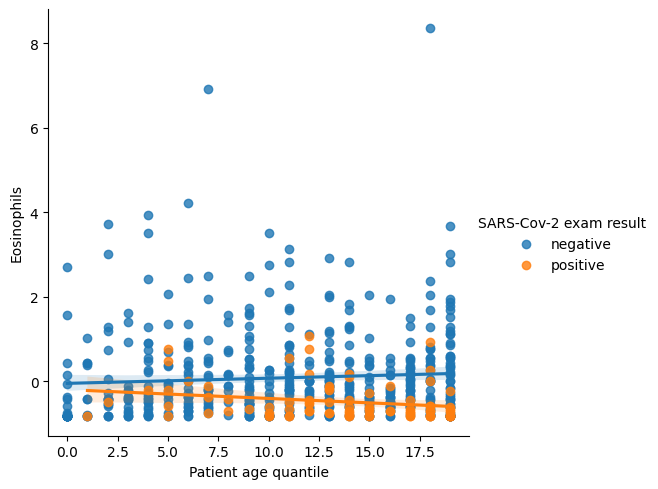

<Figure size 640x480 with 0 Axes>

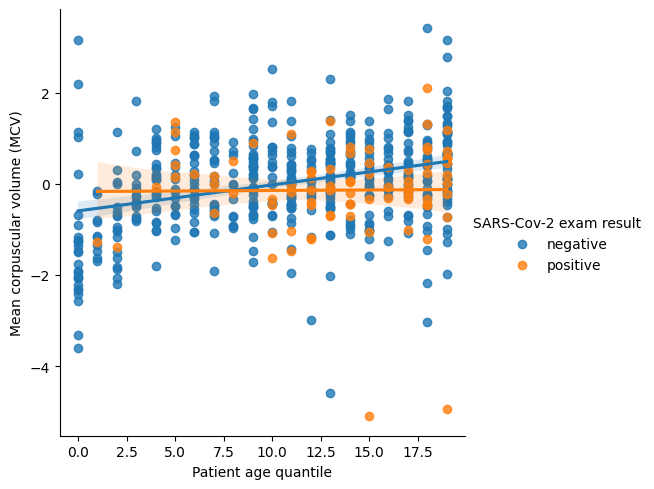

<Figure size 640x480 with 0 Axes>

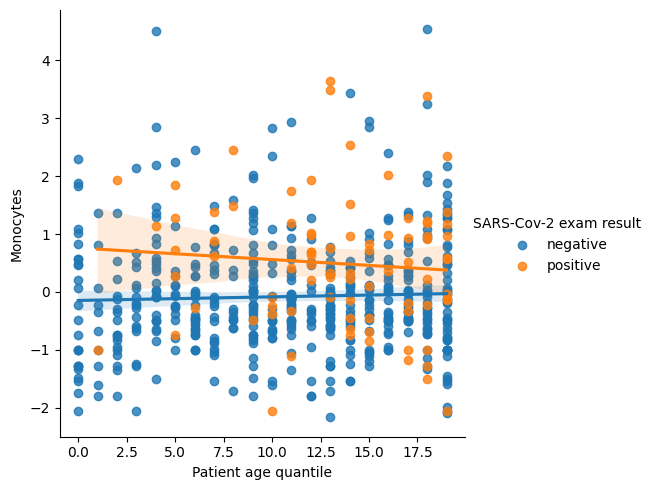

<Figure size 640x480 with 0 Axes>

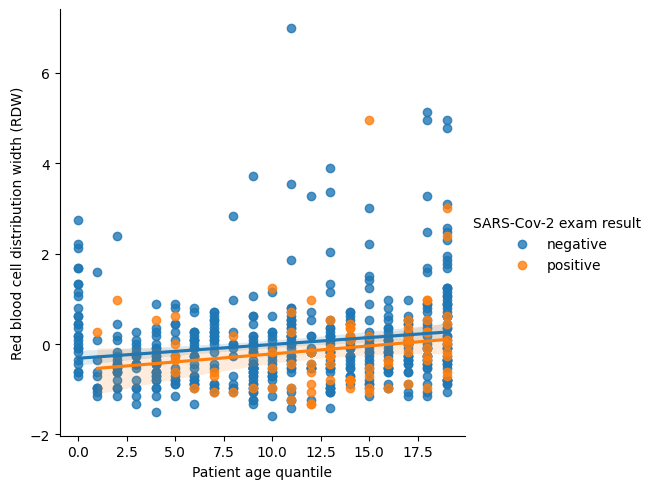

In [35]:
for k in blood_columns:
    plt.figure()
    sns.lmplot(x='Patient age quantile',y=k,hue='SARS-Cov-2 exam result' ,data = df)

## Relation entre Influenza et rapid test

In [36]:
pd.crosstab(df['Influenza A'],df['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [37]:
pd.crosstab(df['Influenza B'],df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

## relation Viral / sanguin

In [38]:
#    blood_columns = df.columns[(missing_rate <0.9) & (missing_rate >0.88)]
#    viral_columns = df.columns[(missing_rate <0.88) & (missing_rate >0.75)]


### Création d'une nouvelle variable "est malade"

In [39]:
df['est malade']=np.sum(df[viral_columns[: -2]] == 'detected' , axis =1  ) >=1

In [40]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
0         NaN        NaN                    NaN              NaN  ...   
1    -0.02234  -0.517413               0.010677         0.102004  ...   
2         NaN        NaN                    NaN              NaN  ...   
3         NaN        NaN                    NaN              NaN  ...   
4         NaN        NaN                    NaN              NaN  ...   

   Parainfluenza 4  Coronavirus229E  CoronavirusOC43  Inf A H1N1 2009  \
0              NaN              NaN              NaN              NaN   
1     not_detected     not_detected     not_detected     not_detected   
2              NaN              NaN              NaN              NaN   
3              NaN              NaN              NaN              NaN   
4     not_detected     not_detected     not_detected     not_detected   

   Bordetella pertussis  Metapneumovirus  Parainfluenza 2  \
0                   NaN              NaN              NaN   
1          not_detected     not_detected     not_detected   
2                   NaN              NaN              NaN   
3                   NaN              NaN              NaN   
4          not_detected     not_detected     not_detected   

   Influenza B, rapid test  Influenza A, rapid test est malade  
0                      NaN                      NaN      False  
1                 negative                 negative       True  
2                      NaN                      NaN      False  
3                      NaN                      NaN      False  
4                      NaN                      NaN       True  

[5 rows x 39 columns]

In [41]:
malade_df = df [df['est malade'] == True ]
non_malade_df = df [df['est malade'] == False ]

C:\Users\melyo\AppData\Local\Temp\ipykernel_5984\390293534.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(malade_df[k] ,label='malade')
C:\Users\melyo\AppData\Local\Temp\ipykernel_5984\390293534.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_malade_df[k] ,label='non_malade' )
C:\Us

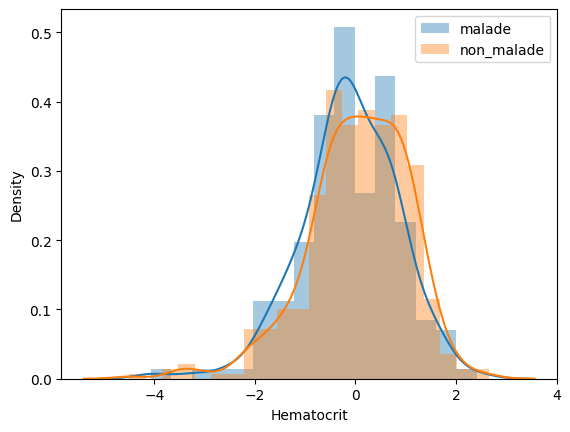

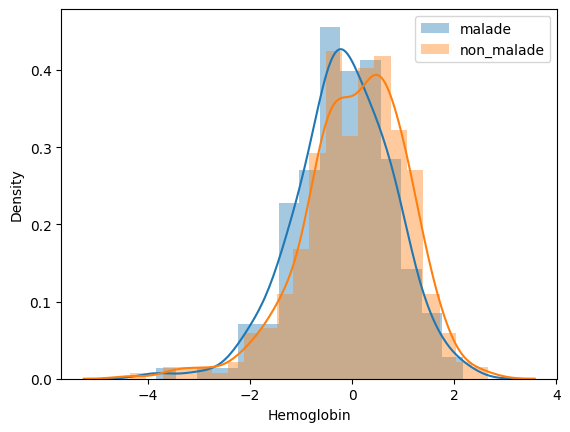

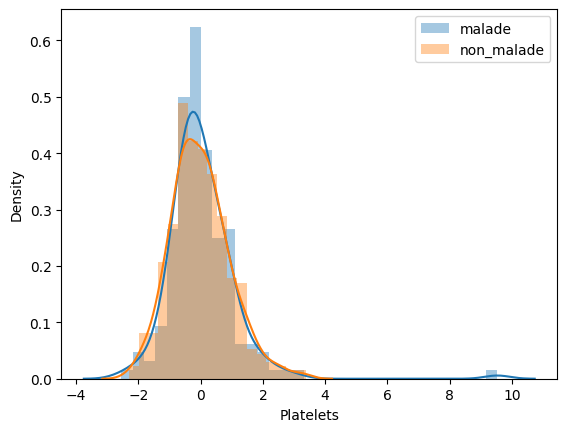

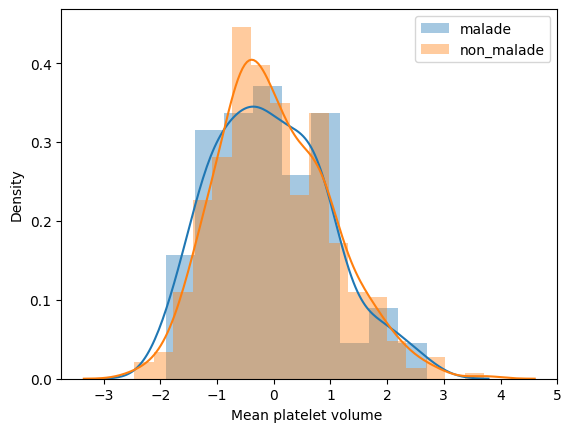

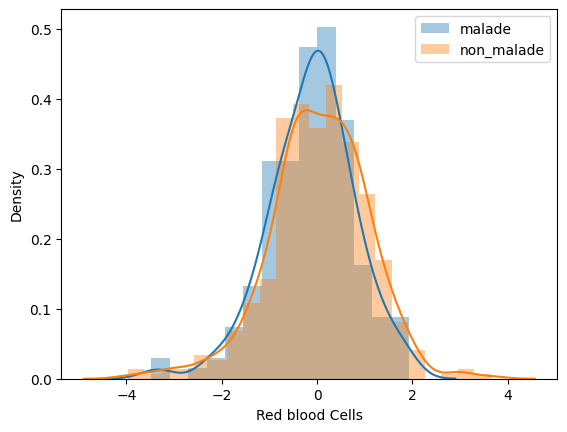

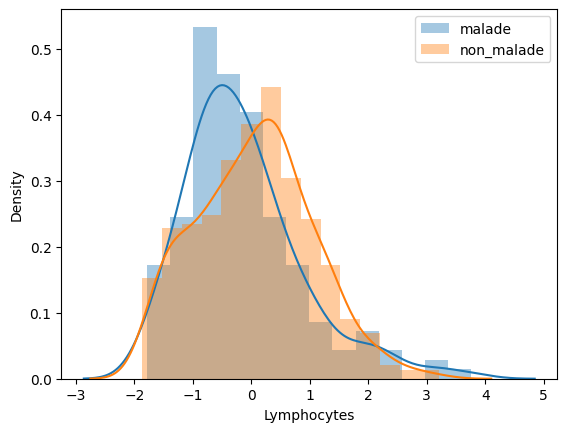

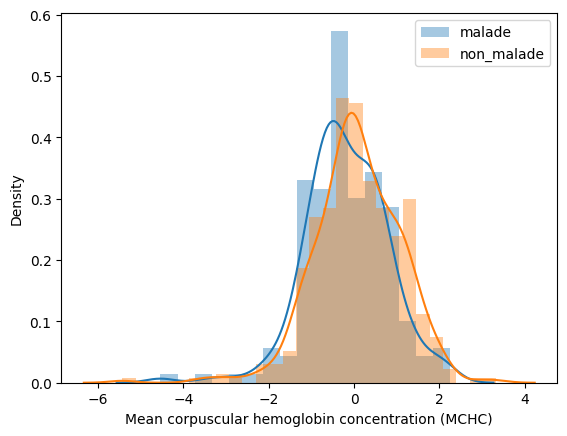

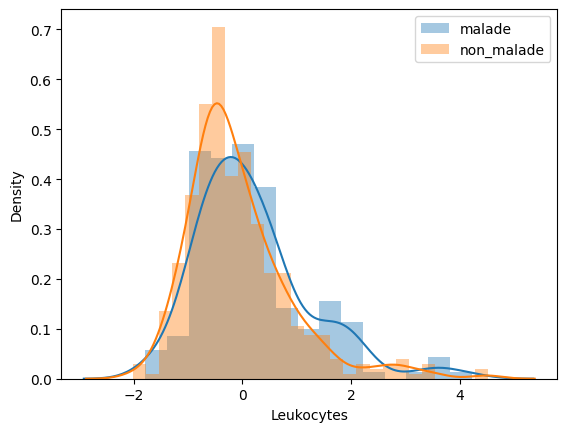

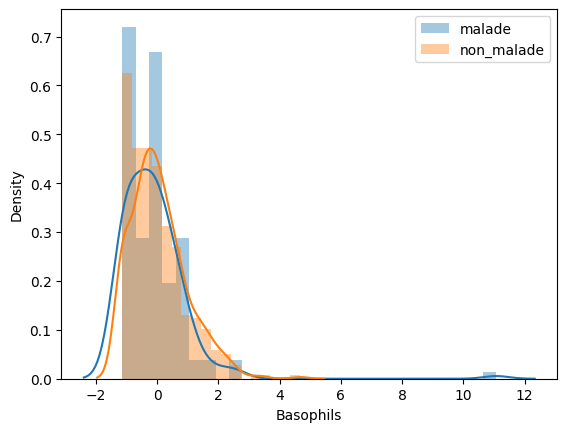

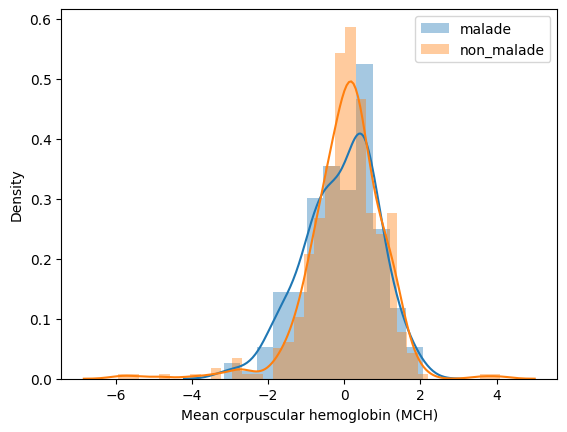

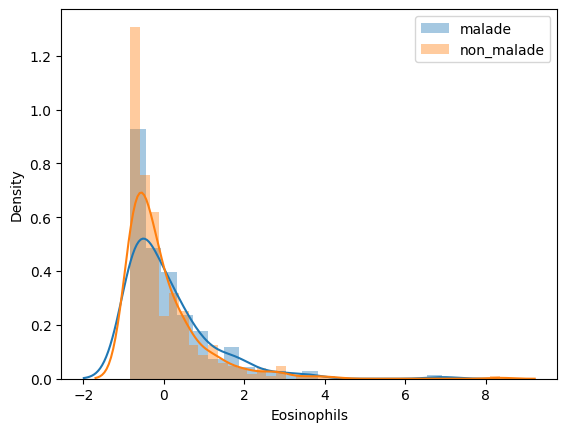

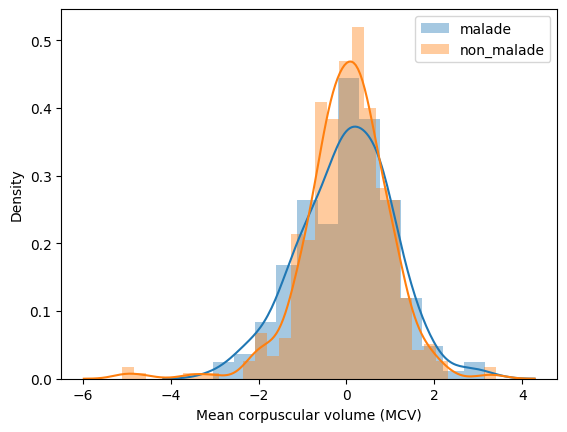

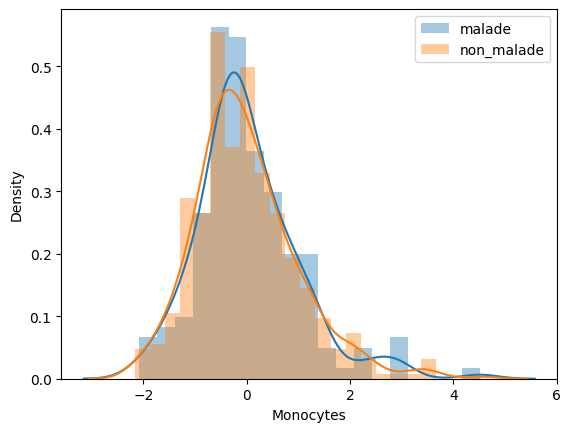

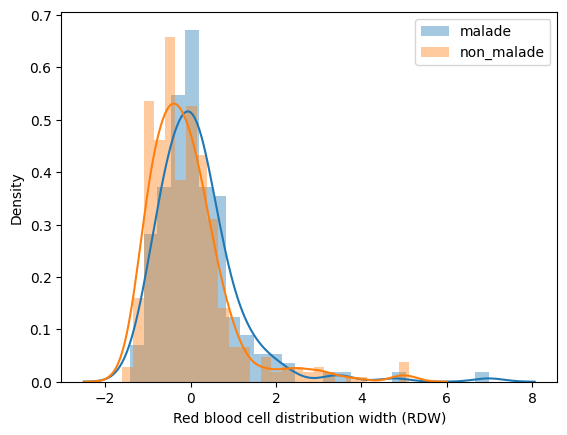

In [42]:
for k in blood_columns:
    plt.figure()
    sns.distplot(malade_df[k] ,label='malade')
    sns.distplot(non_malade_df[k] ,label='non_malade' )
    plt.legend()

In [43]:
df[blood_columns].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [44]:
df[viral_columns].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

In [45]:
df1 = df[viral_columns[:-2]]
df1['covid'] = df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)

C:\Users\melyo\AppData\Local\Temp\ipykernel_5984\3520532109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['covid'] = df['SARS-Cov-2 exam result']


covid
negative    0.91716
positive    0.08284
Name: proportion, dtype: float64

In [46]:
df2 = df[blood_columns]
df2['covid'] = df['SARS-Cov-2 exam result']
df2.dropna()['covid'].value_counts(normalize=True)

C:\Users\melyo\AppData\Local\Temp\ipykernel_5984\4103850288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['covid'] = df['SARS-Cov-2 exam result']


covid
negative    0.864548
positive    0.135452
Name: proportion, dtype: float64

## T-Test

In [47]:
from scipy.stats import ttest_ind

In [48]:
df_postive

Patient age quantile SARS-Cov-2 exam result  \
67                       7               positive   
284                     16               positive   
513                     10               positive   
568                      2               positive   
676                     15               positive   
...                    ...                    ...   
5632                    16               positive   
5633                     4               positive   
5634                    15               positive   
5639                     3               positive   
5643                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
67                                                 0   
284                                                1   
513                                                0   
568                                                0   
676                                                0   
...                                              ...   
5632                                               0   
5633                                               0   
5634                                               0   
5639                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
67                                                    0       
284                                                   0       
513                                                   0       
568                                                   0       
676                                                   0       
...                                                 ...       
5632                                                  0       
5633                                                  0       
5634                                                  0       
5639                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
67                                                    0             NaN   
284                                                   0             NaN   
513                                                   0             NaN   
568                                                   0        0.991838   
676                                                   0             NaN   
...                                                 ...             ...   
5632                                                  0             NaN   
5633                                                  0             NaN   
5634                                                  0             NaN   
5639                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
67           NaN        NaN                    NaN              NaN  ...   
284          NaN        NaN                    NaN              NaN  ...   
513          NaN        NaN                    NaN              NaN  ...   
568     0.792188  -0.341548               1.469188         1.653476  ...   
676          NaN        NaN                    NaN              NaN  ...   
...          ...        ...                    ...              ...  ...   
5632         NaN        NaN                    NaN              NaN  ...   
5633         NaN        NaN                    NaN              NaN  ...   
5634         NaN        NaN                    NaN              NaN  ...   
5639         NaN        NaN                    NaN              NaN  ...   
5643    0.541564  -0.906829              -0.325903         0.578024  ...   

        Adenovirus  Parainfluenza 4  Coronavirus229E  CoronavirusOC43  \
67             NaN              NaN              NaN

In [49]:
balanced_neg = df_negative.sample(df_postive.shape[0])

In [50]:
def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(balanced_neg[col].dropna(), df_postive[col].dropna())
    if p < alpha:
        return 'H0 Rejetée'
    else :
        return 0

In [51]:
for col in blood_columns:
    print(f'{col :-<50} {t_test(col)}')

Hematocrit---------------------------------------- 0
Hemoglobin---------------------------------------- 0
Platelets----------------------------------------- H0 Rejetée
Mean platelet volume ----------------------------- 0
Red blood Cells----------------------------------- 0
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Leukocytes---------------------------------------- H0 Rejetée
Basophils----------------------------------------- 0
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- H0 Rejetée
Mean corpuscular volume (MCV)--------------------- 0
Monocytes----------------------------------------- H0 Rejetée
Red blood cell distribution width (RDW)----------- 0


## PRE-PROCESSING

In [52]:
df = data.copy()
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0         NaN        NaN                    NaN  ...   
1    -0.02234  -0.517413               0.010677  ...   
2         NaN        NaN                    NaN  ...   
3         NaN        NaN                    NaN  ...   
4         NaN        NaN                    NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 111 columns]

## Création des sous-ensembles

In [53]:
missing_rate = df.isna().sum()/df.shape[0]

In [54]:
blood_columns = df.columns[(missing_rate <0.9) & (missing_rate >0.88)]
viral_columns = df.columns[(missing_rate <0.88) & (missing_rate >0.75)]

In [55]:
key_columns = ['Patient age quantile' , 'SARS-Cov-2 exam result']

In [56]:
A = list(blood_columns) + list(viral_columns) + key_columns
df = df[A]
df.head()

Hematocrit  Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0         NaN         NaN        NaN                    NaN              NaN   
1    0.236515    -0.02234  -0.517413               0.010677         0.102004   
2         NaN         NaN        NaN                    NaN              NaN   
3         NaN         NaN        NaN                    NaN              NaN   
4         NaN         NaN        NaN                    NaN              NaN   

   Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  \
0          NaN                                               NaN         NaN   
1     0.318366                                          -0.95079    -0.09461   
2          NaN                                               NaN         NaN   
3          NaN                                               NaN         NaN   
4          NaN                                               NaN         NaN   

   Basophils  Mean corpuscular hemoglobin (MCH)  ...  Coronavirus229E  \
0        NaN                                NaN  ...              NaN   
1  -0.223767                          -0.292269  ...     not_detected   
2        NaN                                NaN  ...              NaN   
3        NaN                                NaN  ...              NaN   
4        NaN                                NaN  ...     not_detected   

   CoronavirusOC43  Inf A H1N1 2009  Bordetella pertussis Metapneumovirus  \
0              NaN              NaN                   NaN             NaN   
1     not_detected     not_detected          not_detected    not_detected   
2              NaN              NaN                   NaN             NaN   
3              NaN              NaN                   NaN             NaN   
4     not_detected     not_detected          not_detected    not_detected   

  Parainfluenza 2 Influenza B, rapid test Influenza A, rapid test  \
0             NaN                     NaN                     NaN   
1    not_detected                negative                negative   
2             NaN                     NaN                     NaN   
3             NaN                     NaN                     NaN   
4    not_detected                     NaN                     NaN   

  Patient age quantile SARS-Cov-2 exam result  
0                   13               negative  
1                   17               negative  
2                    8               negative  
3                    5               negative  
4                   15               negative  

[5 rows x 35 columns]

# TrainTest - Nettoyage - Encodage 

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
trainset ,testset = train_test_split(df , test_size = 0.2, random_state=0 )

In [59]:
trainset['SARS-Cov-2 exam result'].value_counts()

SARS-Cov-2 exam result
negative    4068
positive     447
Name: count, dtype: int64

In [60]:
testset['SARS-Cov-2 exam result'].value_counts()

SARS-Cov-2 exam result
negative    1018
positive     111
Name: count, dtype: int64

# Encodage

In [61]:
def encodage(df):
    code = {'positive' : 1 , 'negative':0 , 'detected':1 , 'not_detected' : 0 }
    
    for k in df.select_dtypes('object'):
        df[k] = df[k].map(code)
    return df 

In [62]:
def impulation(df):
    return df.dropna(axis =0)

In [63]:
def feature_engineering(df):
    df['est malade'] = df[viral_columns].sum(axis=1)>=1
    df = df.drop(viral_columns,axis=1)
    return df 

In [64]:
def processing(df):
    
    df = encodage(df)
    df = feature_engineering(df)
    df = impulation(df)
    
    X = df.drop('SARS-Cov-2 exam result', axis=1)
    y = df['SARS-Cov-2 exam result']
    
    print(y.value_counts())
    
    return X, y

In [65]:
X_train , y_train = processing(trainset)

SARS-Cov-2 exam result
0    422
1     65
Name: count, dtype: int64


In [66]:
X_test , y_test = processing(testset)

SARS-Cov-2 exam result
0    95
1    16
Name: count, dtype: int64


# Procedure d'evalutaion 

In [67]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [68]:
#################################################################################################################

In [69]:
########################################################################################################################

In [70]:
def evaluation0(model, model_name):
    
    with mlflow.start_run(run_name=model_name):
        
       
        model.fit(X_train, y_train)
        ypred = model.predict(X_test)
        
       
        cm = confusion_matrix(y_test, ypred)
        report = classification_report(y_test, ypred, output_dict=True)
        
        
        mlflow.log_metric("accuracy", report['accuracy'])
        mlflow.log_metric("precision", report['weighted avg']['precision'])
        mlflow.log_metric("recall", report['weighted avg']['recall'])
        mlflow.log_metric("f1_score", report['weighted avg']['f1-score'])
        
        
        print(cm)
        print(classification_report(y_test, ypred))
        
       
        N, train_score, val_score = learning_curve(model, X_train, y_train,
                                                  cv=4, scoring='f1',
                                                  train_sizes=np.linspace(0.1, 1, 10))
        
        
        plt.figure(figsize=(12, 8))
        plt.plot(N, train_score.mean(axis=1), label='train score')
        plt.plot(N, val_score.mean(axis=1), label='validation score')
        plt.legend()
        plt.title(f'Learning Curve - {model_name}')
        
        
        plt.savefig(f'learning_curve_{model_name}.png')
        plt.close()
        
        
        mlflow.log_artifact(f'learning_curve_{model_name}.png')
        
        
        mlflow.sklearn.log_model(model, model_name)

In [71]:
#################################################################################################################

In [72]:
#################################################################################################################

In [73]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                             cv=4, scoring='f1',
                                             train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

In [74]:
model_1 = RandomForestClassifier(random_state=0)
model_2 = make_pipeline(PolynomialFeatures(2), SelectKBest(f_classif, k=10),
                   RandomForestClassifier(random_state=0))

[[92  3]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        95
           1       0.62      0.31      0.42        16

    accuracy                           0.87       111
   macro avg       0.76      0.64      0.67       111
weighted avg       0.85      0.87      0.86       111



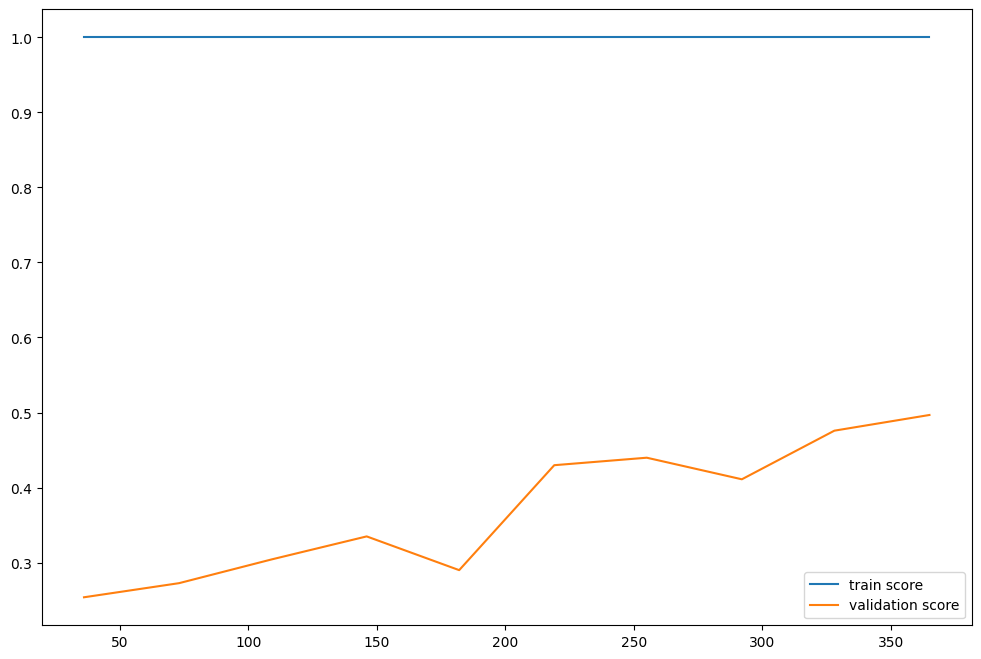

In [75]:
evaluation(model_1)

<Axes: >

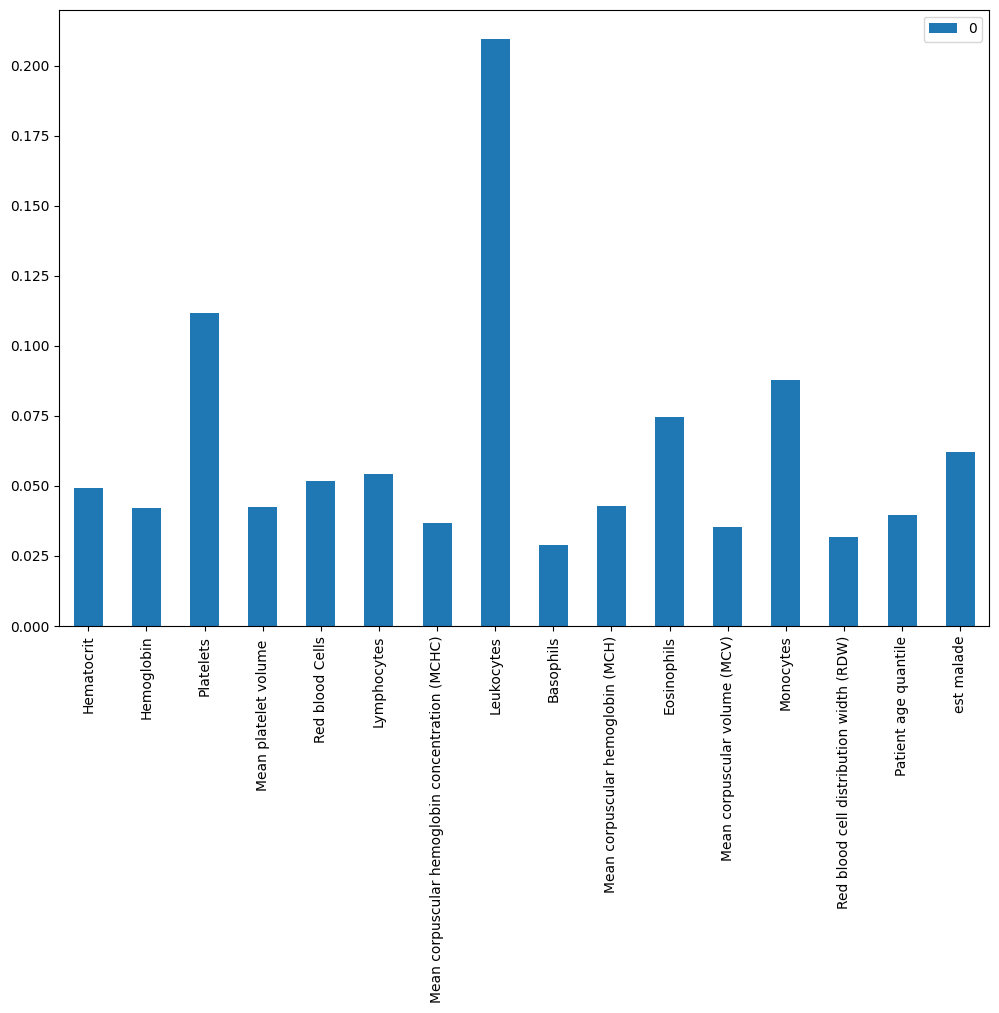

In [76]:
pd.DataFrame(model_1.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))

# Modelisation

In [77]:
######################################################

In [78]:
preprocessor = make_pipeline(
    SimpleImputer(strategy='mean'),   # <--- handles NaNs
    PolynomialFeatures(2, include_bias=False),
    SelectKBest(f_classif, k=10)
)

In [79]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())



In [80]:
#################################################################
mlflow.set_tracking_uri("file:./mlruns")
mlflow.set_experiment("COVID-19_Models")

C:\Users\melyo\AppData\Roaming\Python\Python313\site-packages\mlflow\tracking\_tracking_service\utils.py:178: FutureWarning: The filesystem tracking backend (e.g., './mlruns') will be deprecated in February 2026. Consider transitioning to a database backend (e.g., 'sqlite:///mlflow.db') to take advantage of the latest MLflow features. See https://github.com/mlflow/mlflow/issues/18534 for more details and migration guidance. For migrating existing data, https://github.com/mlflow/mlflow-export-import can be used.
  return FileStore(store_uri, store_uri)
Traceback (most recent call last):
  File "C:\Users\melyo\AppData\Roaming\Python\Python313\site-packages\mlflow\store\tracking\file_store.py", line 379, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
  File "C:\Users\melyo\AppData\Roaming\Python\Python313\site-packages\mlflow\store\tracking\file_store.py", line 477, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
 

<Experiment: artifact_location='file:C:/Users/melyo/mlruns/124246185811337900', creation_time=1771165196243, experiment_id='124246185811337900', last_update_time=1771165196243, lifecycle_stage='active', name='COVID-19_Models', tags={}>

In [81]:
dict_of_models = {
    'RandomForest': RandomForest,
    'AdaBoost': AdaBoost,
    'SVM': SVM,
    'KNN': KNN,
    

    
}

RandomForest
[[91  4]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        95
           1       0.60      0.38      0.46        16

    accuracy                           0.87       111
   macro avg       0.75      0.67      0.70       111
weighted avg       0.86      0.87      0.86       111

AdaBoost
[[90  5]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        95
           1       0.50      0.31      0.38        16

    accuracy                           0.86       111
   macro avg       0.70      0.63      0.65       111
weighted avg       0.83      0.86      0.84       111

SVM
[[91  4]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        95
           1       0.64      0.44      0.52        16

    accuracy                           0.88       111
   macro avg       0.77      0.70      0.73  

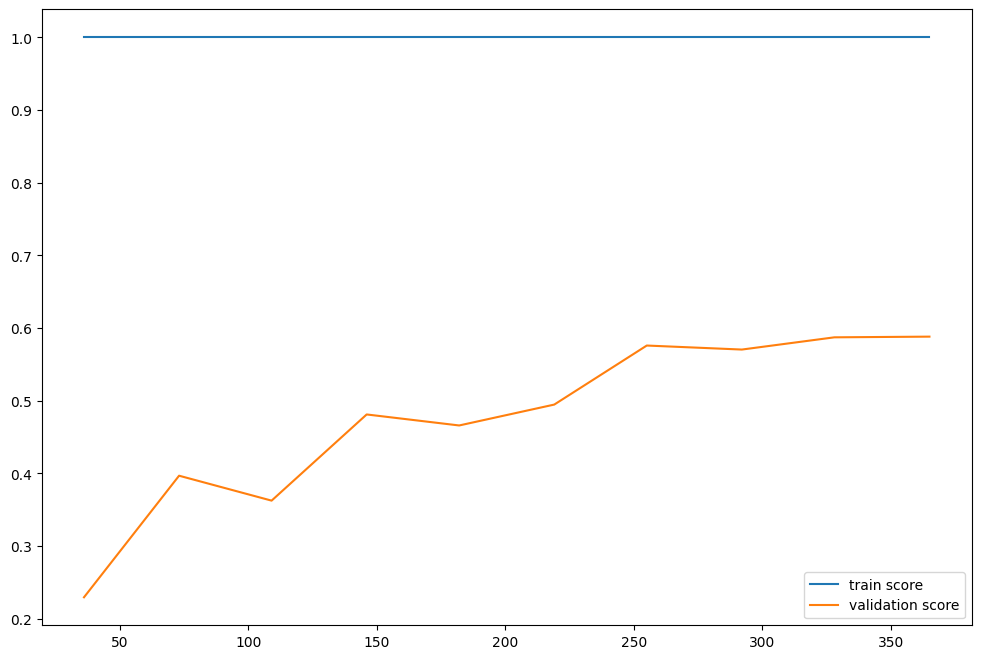

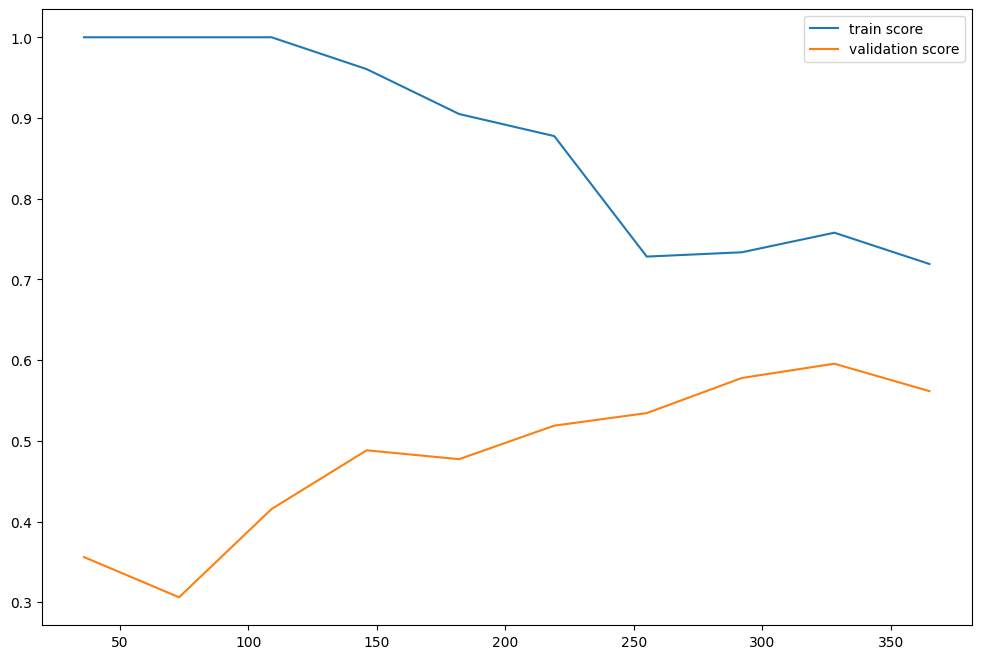

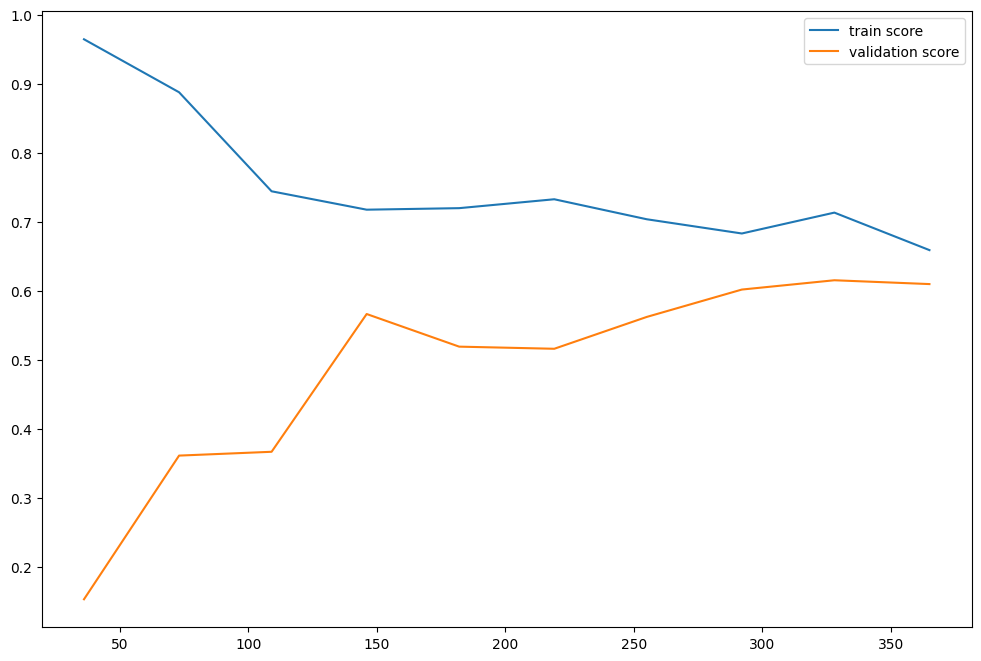

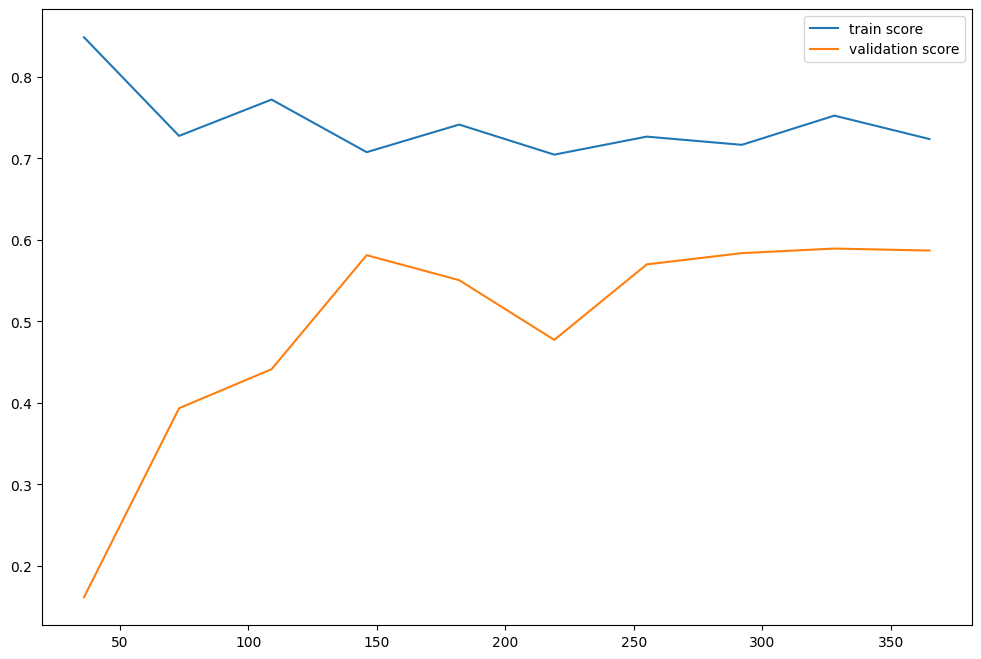

In [82]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)


In [83]:
for name, model in dict_of_models.items():
    print(name)
    evaluation0(model, name)  

2026/02/15 20:56:54 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



RandomForest
[[91  4]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        95
           1       0.60      0.38      0.46        16

    accuracy                           0.87       111
   macro avg       0.75      0.67      0.70       111
weighted avg       0.86      0.87      0.86       111



2026/02/15 20:57:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
C:\Users\melyo\AppData\Roaming\Python\Python313\site-packages\mlflow\models\model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


AdaBoost
[[90  5]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        95
           1       0.50      0.31      0.38        16

    accuracy                           0.86       111
   macro avg       0.70      0.63      0.65       111
weighted avg       0.83      0.86      0.84       111



2026/02/15 20:57:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
C:\Users\melyo\AppData\Roaming\Python\Python313\site-packages\mlflow\models\model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


SVM
[[91  4]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        95
           1       0.64      0.44      0.52        16

    accuracy                           0.88       111
   macro avg       0.77      0.70      0.73       111
weighted avg       0.87      0.88      0.87       111



2026/02/15 20:58:05 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
C:\Users\melyo\AppData\Roaming\Python\Python313\site-packages\mlflow\models\model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


KNN
[[88  7]
 [ 8  8]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        95
           1       0.53      0.50      0.52        16

    accuracy                           0.86       111
   macro avg       0.72      0.71      0.72       111
weighted avg       0.86      0.86      0.86       111



2026/02/15 20:58:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
C:\Users\melyo\AppData\Roaming\Python\Python313\site-packages\mlflow\models\model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


# OPTIMISATION

In [84]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [85]:
SVM

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                 ('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [86]:
hyper_params = {'svc__gamma':[1e-3, 1e-4, 0.0005],
                'svc__C':[1, 10, 100, 1000, 3000], 
               'pipeline__polynomialfeatures__degree':[2, 3],
               'pipeline__selectkbest__k': range(45, 60)}

In [87]:
grid = RandomizedSearchCV(SVM, hyper_params, scoring='recall', cv=4,
                          n_iter=40)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

{'svc__gamma': 0.001, 'svc__C': 1000, 'pipeline__selectkbest__k': 49, 'pipeline__polynomialfeatures__degree': 3}
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        95
           1       0.67      0.62      0.65        16

    accuracy                           0.90       111
   macro avg       0.80      0.79      0.79       111
weighted avg       0.90      0.90      0.90       111



In [88]:


with mlflow.start_run(run_name="Best_Model_GridSearch"):
    
   
    mlflow.log_params(grid.best_params_)
    
    
    y_pred = grid.predict(X_test)
    
    
    report = classification_report(y_test, y_pred, output_dict=True)
    mlflow.log_metric("accuracy", report['accuracy'])
    mlflow.log_metric("precision", report['weighted avg']['precision'])
    mlflow.log_metric("recall", report['weighted avg']['recall'])
    mlflow.log_metric("f1_score", report['weighted avg']['f1-score'])
    

    mlflow.sklearn.log_model(grid.best_estimator_, "best_svm_model")
    
    print(grid.best_params_)
    print(classification_report(y_test, y_pred))


evaluation0(grid.best_estimator_, "Best_Model_Evaluation")

2026/02/15 20:58:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
C:\Users\melyo\AppData\Roaming\Python\Python313\site-packages\mlflow\models\model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


{'svc__gamma': 0.001, 'svc__C': 1000, 'pipeline__selectkbest__k': 49, 'pipeline__polynomialfeatures__degree': 3}
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        95
           1       0.67      0.62      0.65        16

    accuracy                           0.90       111
   macro avg       0.80      0.79      0.79       111
weighted avg       0.90      0.90      0.90       111

[[90  5]
 [ 6 10]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        95
           1       0.67      0.62      0.65        16

    accuracy                           0.90       111
   macro avg       0.80      0.79      0.79       111
weighted avg       0.90      0.90      0.90       111



2026/02/15 20:59:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
C:\Users\melyo\AppData\Roaming\Python\Python313\site-packages\mlflow\models\model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


In [89]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

[[90  5]
 [ 6 10]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        95
           1       0.67      0.62      0.65        16

    accuracy                           0.90       111
   macro avg       0.80      0.79      0.79       111
weighted avg       0.90      0.90      0.90       111



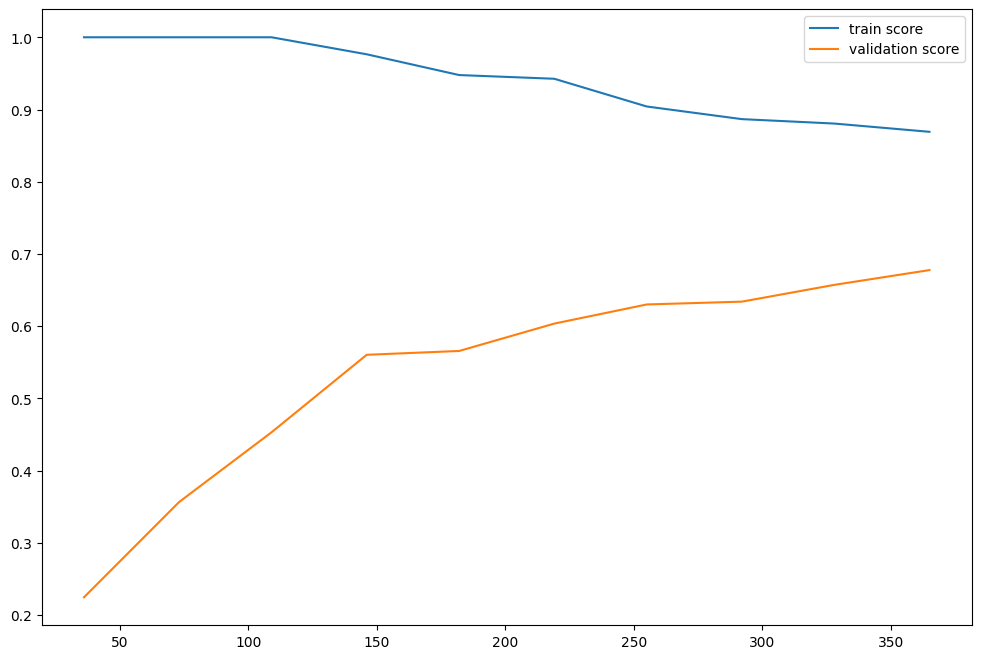

In [90]:
evaluation(grid.best_estimator_)

# Precision Recall Curve

In [91]:
from sklearn.metrics import precision_recall_curve

In [92]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))

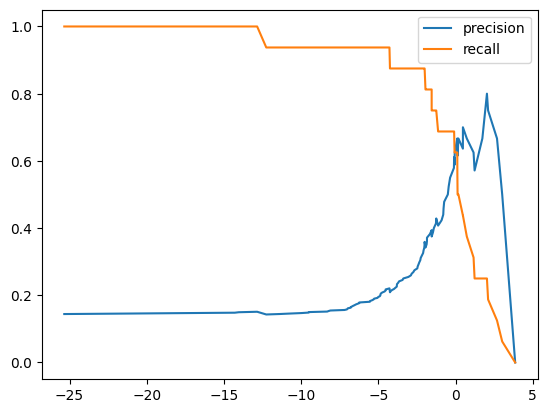

In [93]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [94]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold


In [95]:
y_pred = model_final(grid.best_estimator_, X_test, threshold=-1)

In [96]:
from sklearn.metrics import recall_score

In [97]:
f1_score(y_test, y_pred)

0.5238095238095238

In [98]:
recall_score(y_test, y_pred)

0.6875

In [99]:
# ========== INFORMATIONS MLFLOW ==========

import os

print("\n" + "="*50)
print("INFORMATIONS MLFLOW")
print("="*50)
print(f"Dossier MLflow: {os.path.abspath('./mlruns')}")
print("\nPour visualiser les résultats dans MLflow UI:")
print("1. Ouvre un nouveau terminal")
print("2. Exécute: mlflow ui")
print("3. Ouvre http://localhost:5000 dans ton navigateur")
print("\nSi le port 5000 est déjà utilisé, essaie:")
print("mlflow ui --port 5001")


INFORMATIONS MLFLOW
Dossier MLflow: C:\Users\melyo\mlruns

Pour visualiser les résultats dans MLflow UI:
1. Ouvre un nouveau terminal
2. Exécute: mlflow ui
3. Ouvre http://localhost:5000 dans ton navigateur

Si le port 5000 est déjà utilisé, essaie:
mlflow ui --port 5001
